<a href="https://colab.research.google.com/github/SebastianMark32/Thesis/blob/master/Sebastian_Sleep_Data_WHOOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sebastian Mark WHOOP Data - January 2024:

A sleep study was conducted throughout January, spanning from January 5th to February 6th. The study focused on monitoring various physiological metrics and sleep patterns.

Measurement Method:
A wristband worn continuously, commencing on January 5th, recorded key data points such as time to bed, nocturnal awakenings, heart rate, heart rate variability, breathing rate, and more.

The primary objective of this data tracking was to assess my sleep regularity in comparison to other sleep datasets. The aim was to identify environmental and physiological factors that either positively contribute to or impede the quality and duration of my sleep. Understanding the impact of certain features on my sleep is crucial for predicting potential long-term effects on my cognitive and physical performance.

Disclaimer: The data metrics presented here are derived from a limited sample size, utilizing the internal algorithm of the WHOOP Wearable technology company.



In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
from google.colab import drive

# Mounting the file on Google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

sebastians_path_whoop='/content/sleeps.csv'
sleep_data_whoop = pd.read_csv(sebastians_path_whoop)
# Head() will display the first 5 rows of the data frame
##df.head()

# print("-----Header--------")
# sleep_data_whoop_index = pd.to_datetime(sleep_data_whoop['Cycle end time'])
sleep_whoop_header = sleep_data_whoop.head()
print(sleep_whoop_header)
print("-------------Entire Data Set--------------------")
print(sleep_data_whoop)



      Cycle start time       Cycle end time Cycle timezone  \
0  2024-03-26 00:39:43                  NaN      UTC-04:00   
1  2024-03-22 23:45:31  2024-03-23 23:45:31      UTC-04:00   
2  2024-03-22 00:46:32  2024-03-22 23:45:31      UTC-04:00   
3  2024-03-21 01:24:36  2024-03-22 00:46:32      UTC-04:00   
4  2024-03-20 00:24:46  2024-03-21 01:24:36      UTC-04:00   

           Sleep onset           Wake onset  Sleep performance %  \
0  2024-03-26 00:39:43  2024-03-26 06:30:07                   57   
1  2024-03-22 23:45:31  2024-03-23 09:40:44                   83   
2  2024-03-22 00:46:32  2024-03-22 08:34:41                   73   
3  2024-03-21 01:24:36  2024-03-21 07:19:48                   55   
4  2024-03-20 00:24:46  2024-03-20 06:59:53                   64   

   Respiratory rate (rpm)  Asleep duration (min)  In bed duration (min)  \
0                    14.3                    293                    329   
1                    13.7                    465                    

## Seaborn plot of Sebastian Mark Sleep Metrics

My sleep metrics include several important features. These include time to bed and onset awakeness. Additionally, I consider total sleep duration compared to the optimal amount of sleep required. Furthermore, I analyze light sleep, rapid eye movement (REM) sleep, and deep sleep stages.

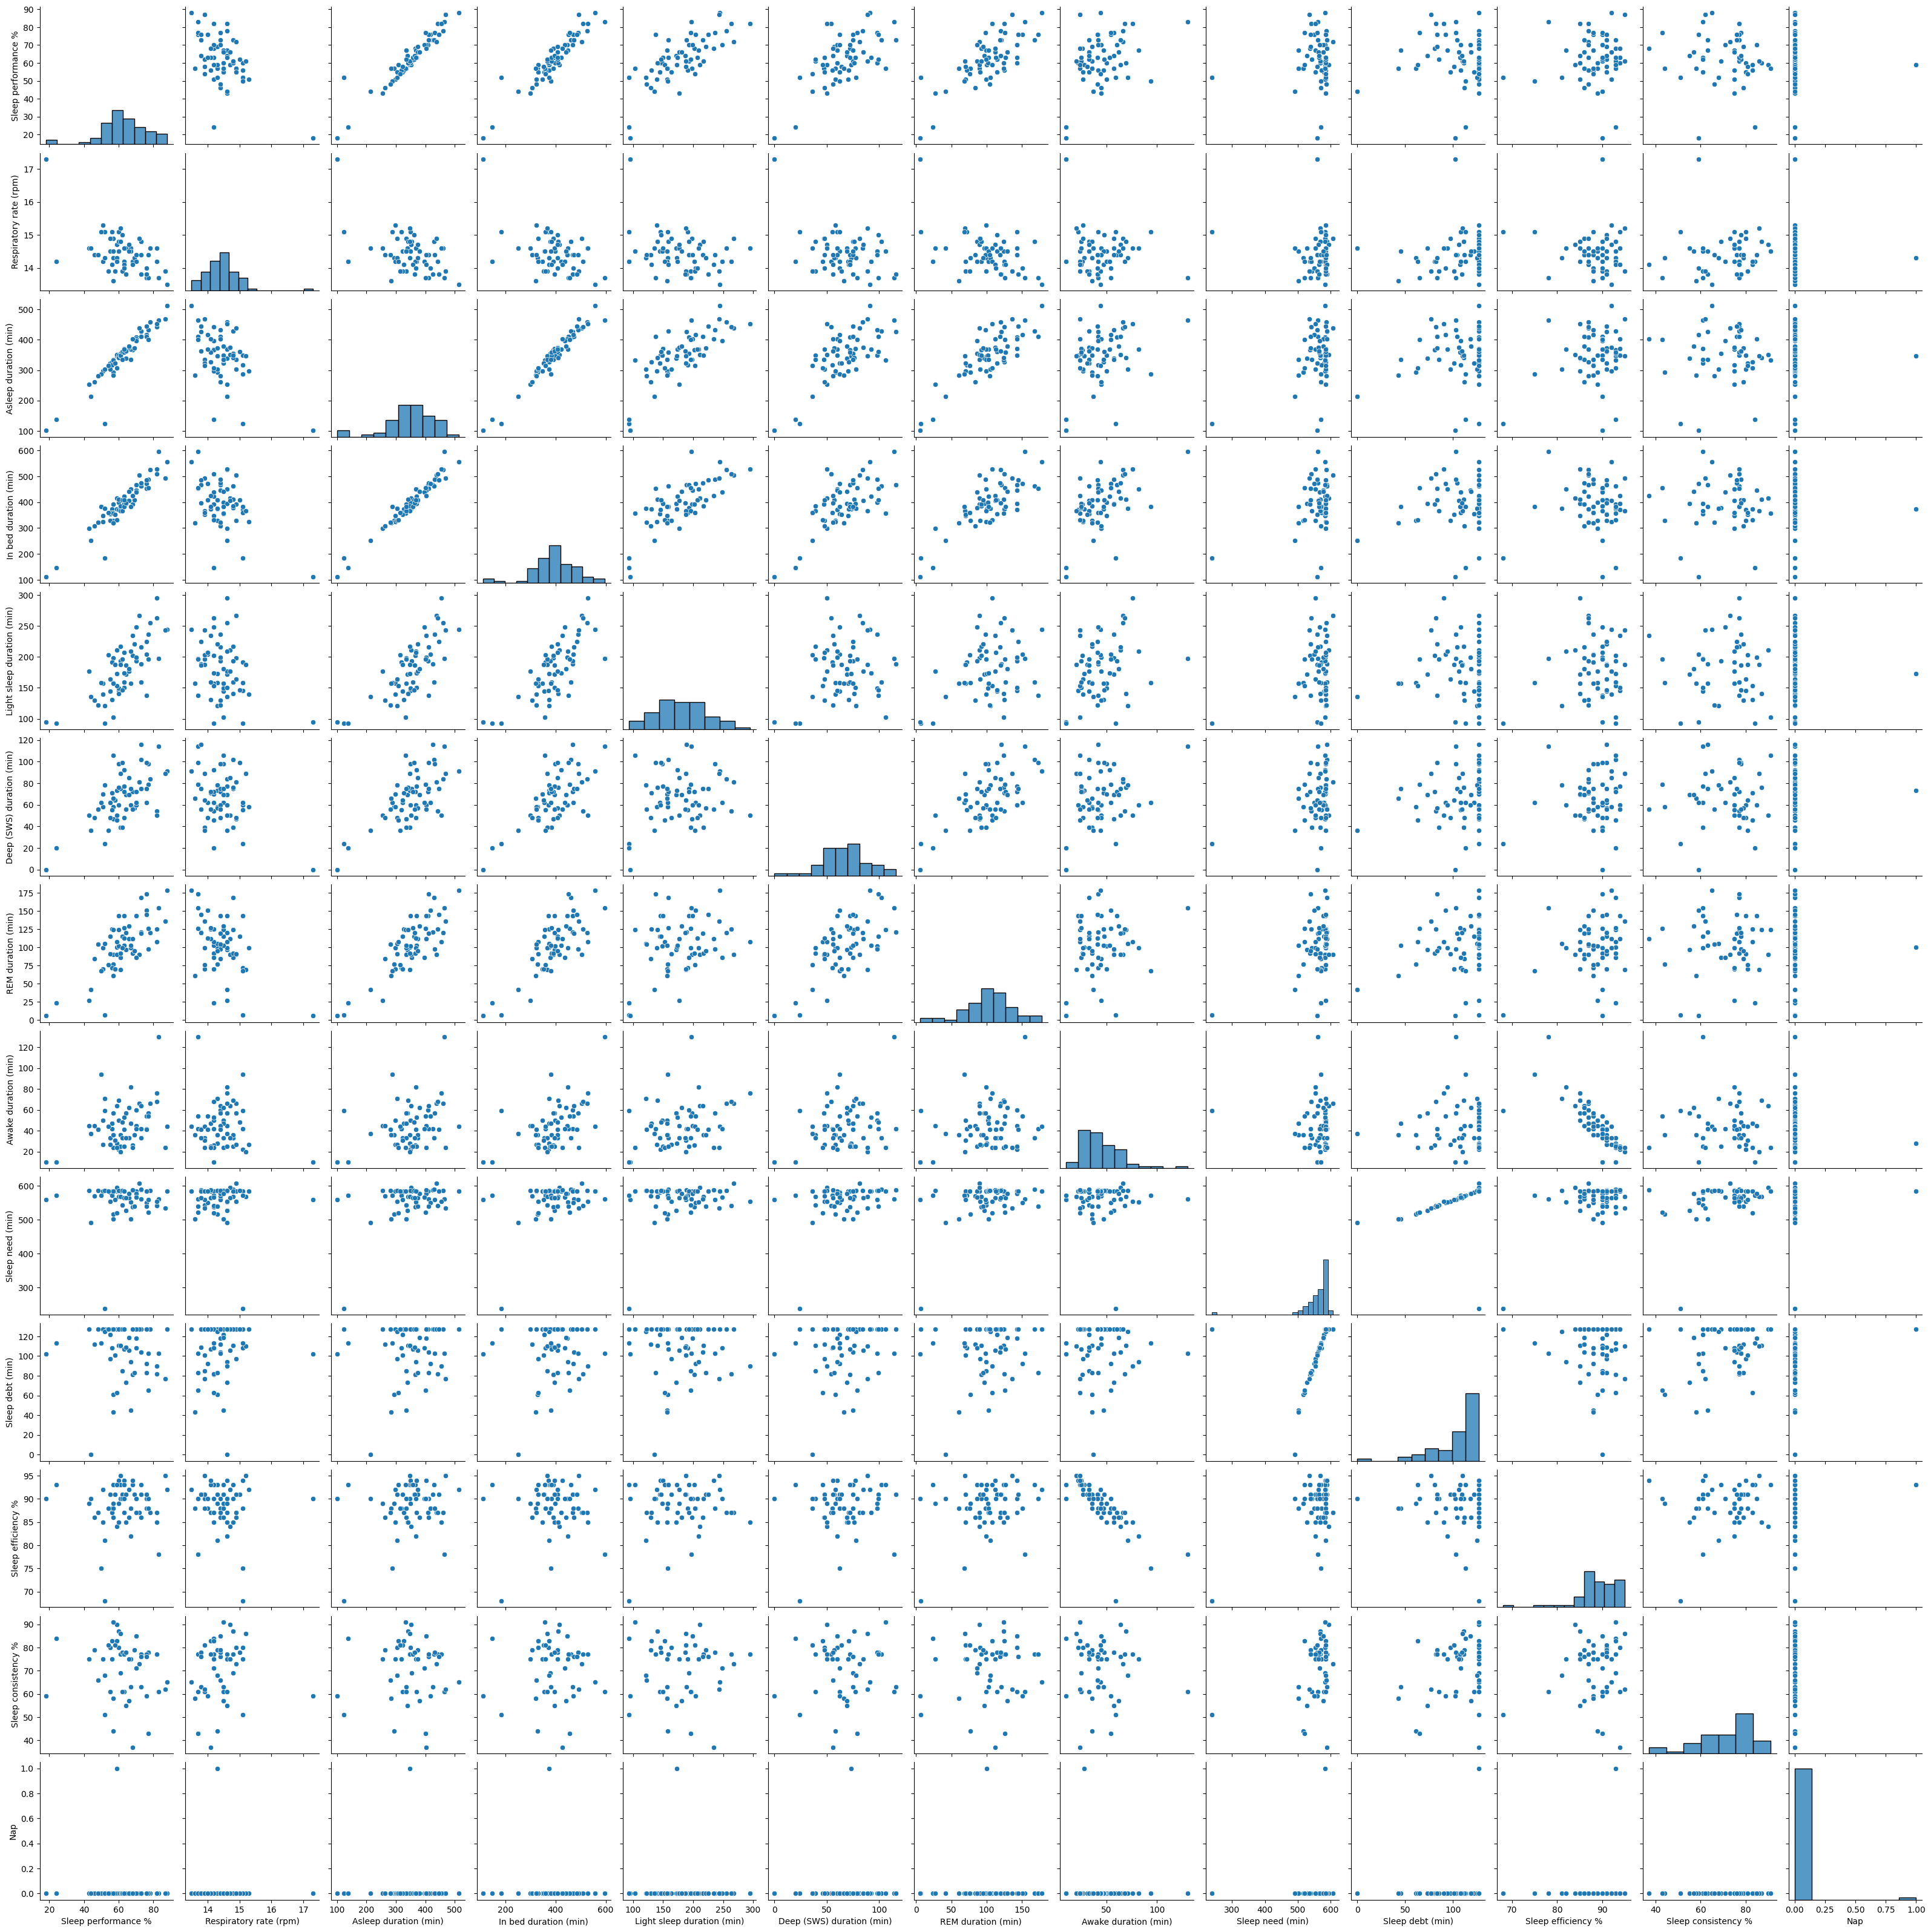

In [ ]:
sns.pairplot(sleep_data_whoop)

In [ ]:

sebastians_path_whoop_physiological ='//content/physiological_cycles.csv'
sleep_data_whoop_physio = pd.read_csv(sebastians_path_whoop_physiological)
# Head() will display the first 5 rows of the data frame
##df.head()
print("-------------Entire Data Set--------------------")
print(sleep_data_whoop_physio)

-------------Entire Data Set--------------------
       Cycle start time       Cycle end time Cycle timezone  Recovery score %  \
0   2024-03-26 00:39:43                  NaN      UTC-04:00              64.0   
1   2024-03-25 00:00:00  2024-03-26 00:39:43      UTC-04:00               NaN   
2   2024-03-22 23:45:31  2024-03-23 23:45:31      UTC-04:00              85.0   
3   2024-03-22 00:46:32  2024-03-22 23:45:31      UTC-04:00              71.0   
4   2024-03-21 01:24:36  2024-03-22 00:46:32      UTC-04:00              55.0   
..                  ...                  ...            ...               ...   
64  2024-01-08 00:20:09  2024-01-09 02:11:00      UTC-05:00              74.0   
65  2024-01-07 01:50:32  2024-01-08 00:20:09      UTC-05:00              65.0   
66  2024-01-05 23:04:34  2024-01-07 01:50:32      UTC-05:00              62.0   
67  2024-01-04 23:27:26  2024-01-05 23:04:34      UTC-05:00              34.0   
68  2024-01-04 00:00:00  2024-01-04 23:27:26      UTC-05:00 


##Seaborn plot of Sebastian Mark's physiological data

---



Physiological data, including resting heart rate, skin temperature, daily strain, maximum heart rate (HR), etc.

Plotting all columns in rows in a 69 x 26 matrix (Excel). In this study, we aim to investigate certain physiological factors that may influence sleep quality. For instance, exploring the potential relationship between strain and heart rate can shed light on how various physical and biological factors contribute to deep sleep, light sleep, and onset awakeness.

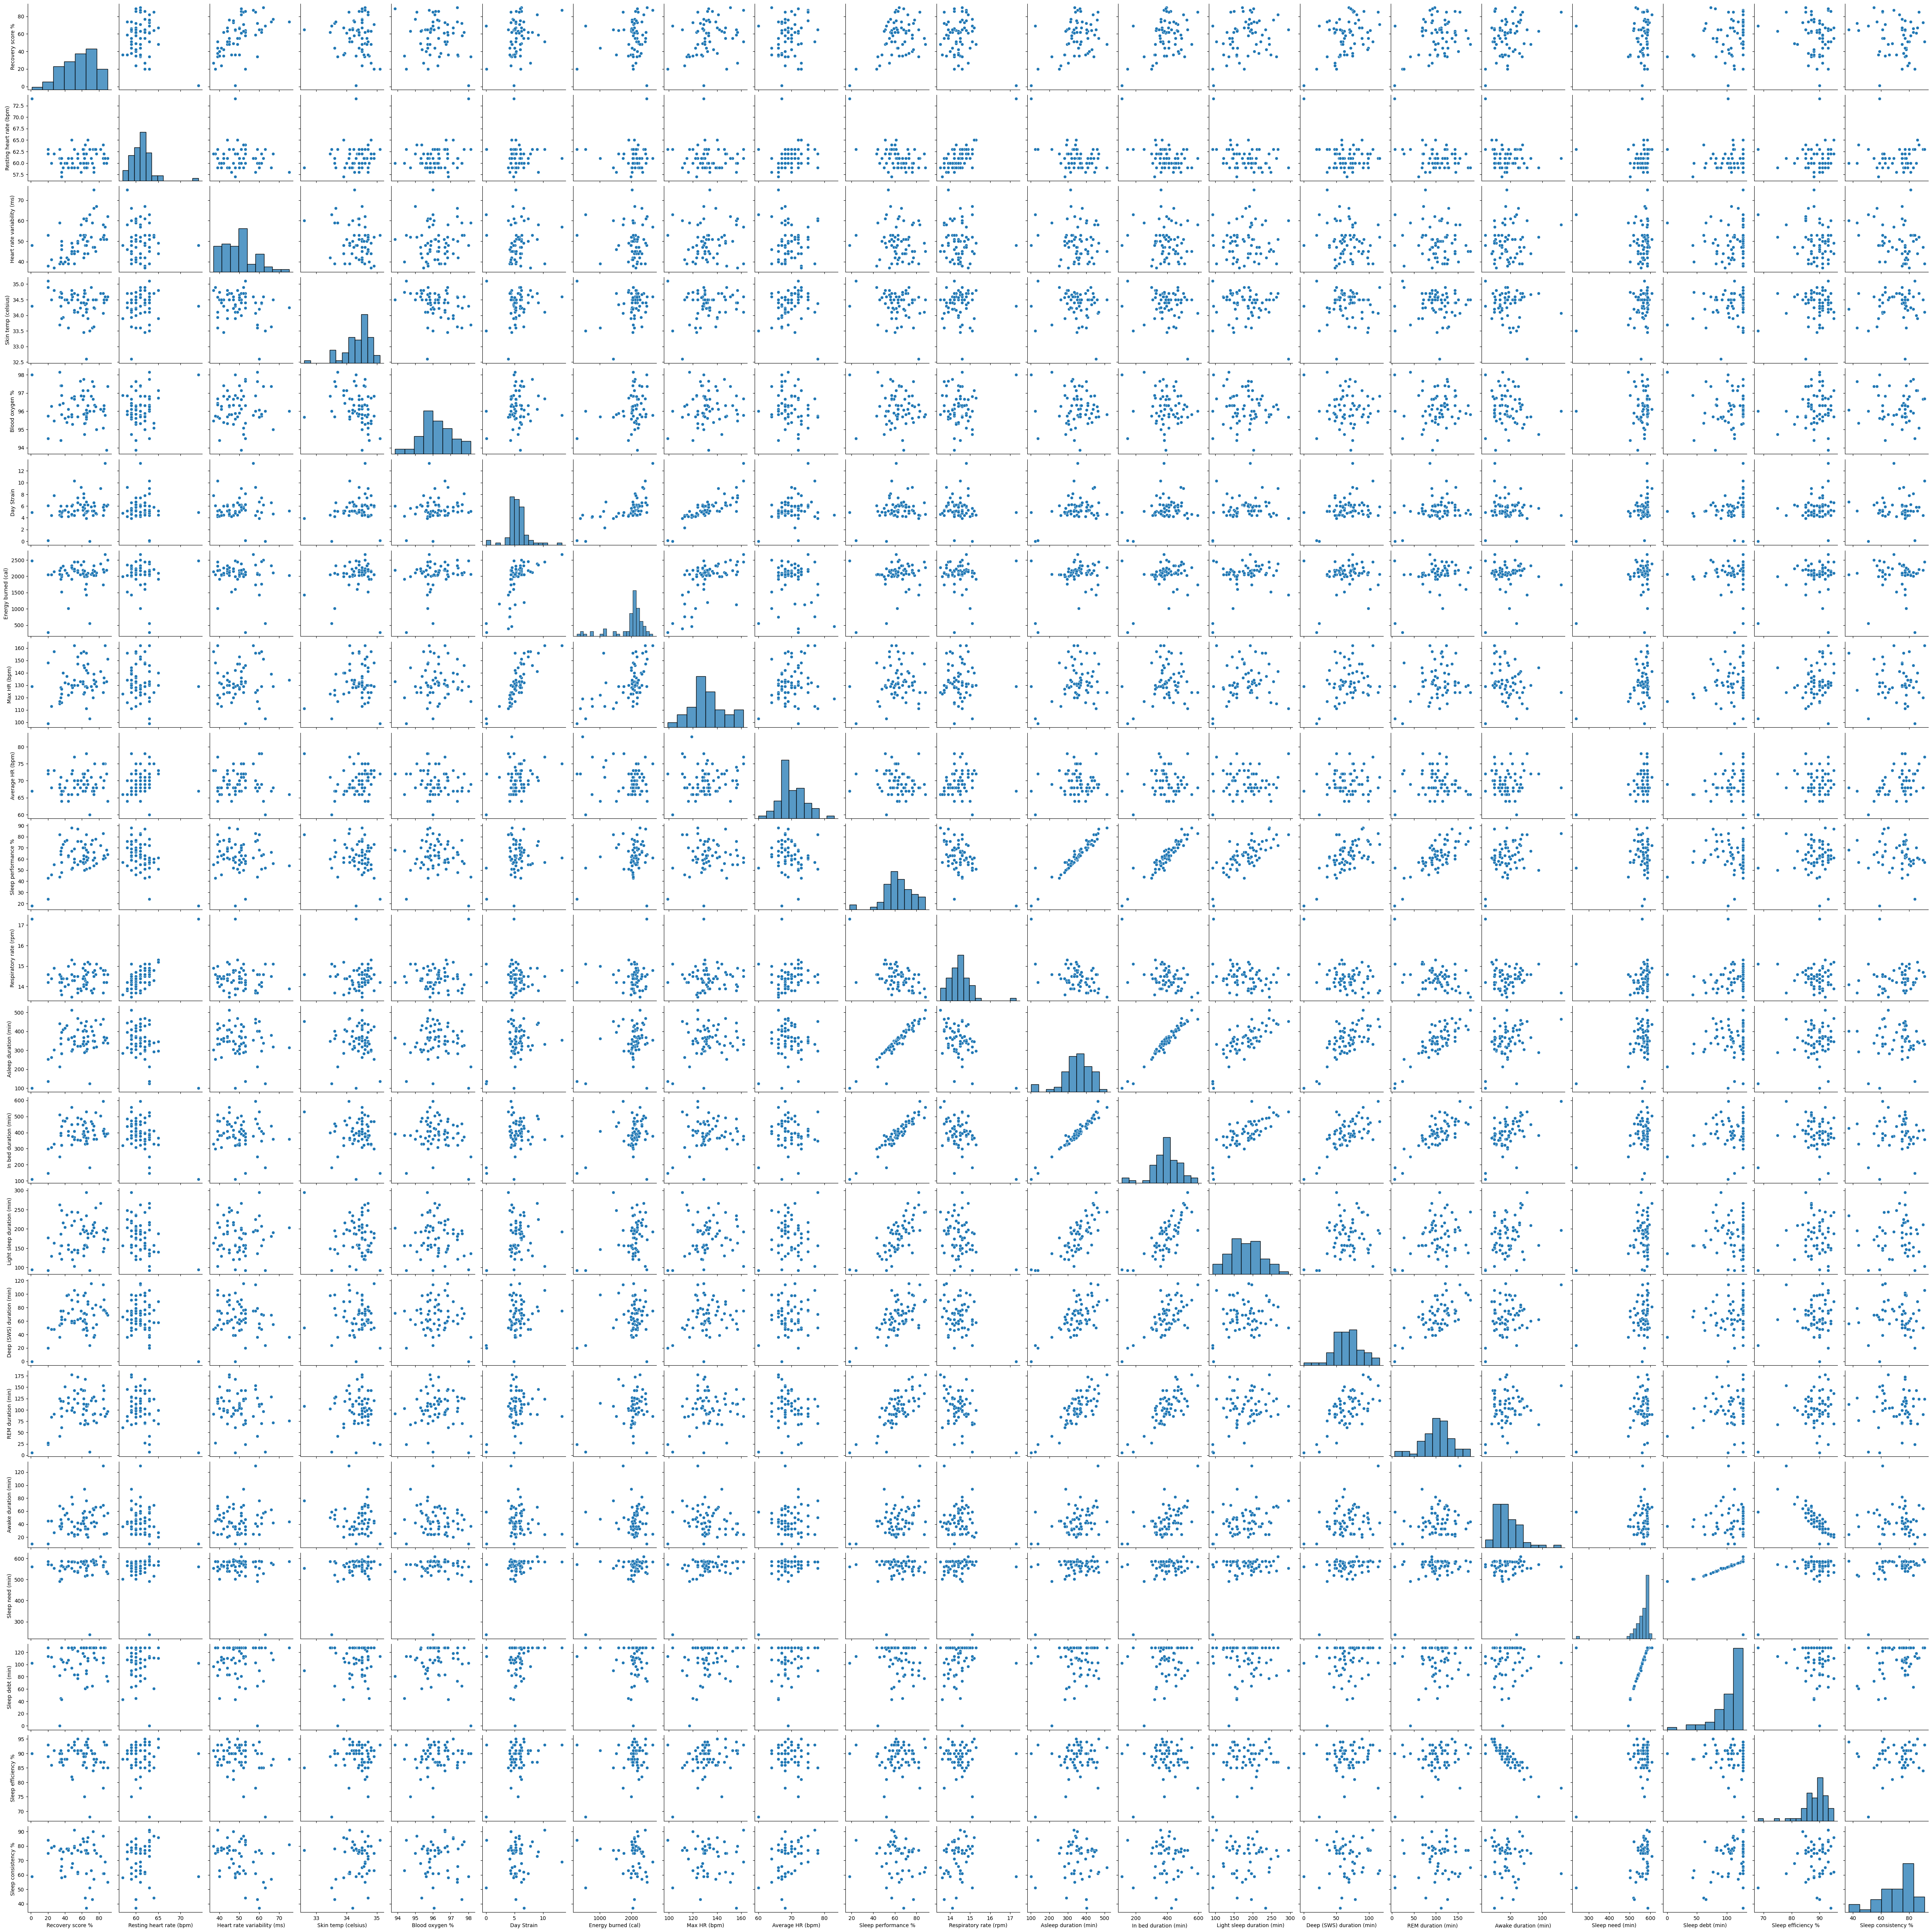

In [ ]:
sns.pairplot(sleep_data_whoop_physio)

In [ ]:
# print("----------Before------------------------------")
sleep_data_whoop_parse = np.array(sleep_data_whoop.iloc[:, [5,6]])
# print(sleep_data_parse[0:30])
# gender_column = np.array(sleep_data.iloc[:30,[1]])
print("Sleep Performance % and Respirtory Rate:\n ",sleep_data_whoop_parse)

sleep_whoop_performance = np.array(sleep_data_whoop.iloc[:, [5]])
mean_sleep_whoop_performance = np.mean(sleep_whoop_performance)
variance_sleep_performance = np.var(sleep_whoop_performance)
standard_deviation_sleep_performance = np.sqrt(variance_sleep_performance)


print("--------------------Printed Statistics for Sleep Performance-------------------------------------")
print("Sleep performance column:\n", sleep_whoop_performance)
print("Mean for sleep performance:", mean_sleep_whoop_performance)
print("Variance for sleep performance:", variance_sleep_performance)
print("Standard deviation for sleep performance:", standard_deviation_sleep_performance)

print("--------------------Printed Statistics for  Respirtory Rate-------------------------------------")
sleep_whoop_performance_resp = np.array(sleep_data_whoop.iloc[:, [6]])
mean_sleep_whoop_performance_resp = np.mean(sleep_whoop_performance_resp)
variance_sleep_performance_resp = np.var(sleep_whoop_performance_resp)
standard_deviation_sleep_performance_resp = np.sqrt(variance_sleep_performance_resp)
print("Sleep respirtory rate column:\n", standard_deviation_sleep_performance_resp)
print("Mean for respirtory rate:", mean_sleep_whoop_performance_resp)
print("Variance for respirtory rate:", variance_sleep_performance_resp)
print("Standard deviation for respirtory rate:", standard_deviation_sleep_performance_resp)






Sleep Performance % and Respirtory Rate:
  [[57.  14.3]
 [83.  13.7]
 [73.  13.8]
 [55.  14.5]
 [64.  14.6]
 [52.  15.1]
 [59.  14.3]
 [18.  17.3]
 [73.  14.8]
 [56.  14.1]
 [57.  14.9]
 [51.  15.3]
 [51.  14.2]
 [60.  15.1]
 [56.  15.1]
 [72.  14.9]
 [61.  14.8]
 [59.  14.7]
 [57.  14.5]
 [60.  14.5]
 [63.  14.2]
 [24.  14.2]
 [60.  14.8]
 [61.  15.2]
 [61.  14.8]
 [68.  14.2]
 [78.  14.6]
 [63.  14.6]
 [50.  15.1]
 [70.  14.4]
 [62.  15. ]
 [43.  14.6]
 [52.  14.3]
 [55.  14.9]
 [73.  14.4]
 [62.  13.9]
 [76.  14. ]
 [67.  14.6]
 [66.  14.7]
 [59.  14.2]
 [82.  14.2]
 [77.  14.4]
 [63.  14.1]
 [69.  14.3]
 [76.  13.7]
 [67.  14.5]
 [88.  13.5]
 [46.  14.4]
 [70.  14.4]
 [58.  13.9]
 [64.  13.8]
 [70.  14.2]
 [57.  13.6]
 [87.  13.9]
 [77.  13.7]
 [82.  14.6]
 [76.  13.8]
 [54.  13.9]
 [48.  14.4]
 [66.  14.5]
 [68.  14.1]
 [63.  14. ]
 [44.  14.6]]
--------------------Printed Statistics for Sleep Performance-------------------------------------
Sleep performance column:
 [[57]
 [83]


In [ ]:
sleep_data_whoop_physio.head()
#sns.heatmap(sleep_data_whoop_physio.corr())
#sns.set_style("whitegrid")


Cycle start time       Cycle end time Cycle timezone  Recovery score %  \
0  2024-03-26 00:39:43                  NaN      UTC-04:00              64.0   
1  2024-03-25 00:00:00  2024-03-26 00:39:43      UTC-04:00               NaN   
2  2024-03-22 23:45:31  2024-03-23 23:45:31      UTC-04:00              85.0   
3  2024-03-22 00:46:32  2024-03-22 23:45:31      UTC-04:00              71.0   
4  2024-03-21 01:24:36  2024-03-22 00:46:32      UTC-04:00              55.0   

   Resting heart rate (bpm)  Heart rate variability (ms)  Skin temp (celsius)  \
0                      64.0                         53.0                34.70   
1                       NaN                          NaN                  NaN   
2                      61.0                         58.0                34.07   
3                      61.0                         52.0                34.90   
4                      61.0                         50.0                34.66   

   Blood oxygen %  Day Strain  Energy burned (cal)  ...  \
0           95.36         NaN                  NaN  ...   
1             NaN         2.3               1153.0  ...   
2           96.00         4.4               1737.0  ...   
3           96.82         5.9               2067.0  ...   
4           96.31         7.4               2181.0  ...   

   Asleep duration (min)  In bed duration (min) Light sleep duration (min)  \
0                  293.0                  329.0                      158.0   
1                    NaN                    NaN                        NaN   
2                  465.0                  595.0                      197.0   
3                  426.0                  468.0                      189.0   
4                  322.0                  355.0                      145.0   

  Deep (SWS) duration (min)  REM duration (min)  Awake duration (min)  \
0                      58.0                77.0                  36.0   
1                       NaN                 NaN                   NaN   
2                     114.0               154.0                 130.0   
3                     116.0               121.0                  42.0   
4                      62.0               115.0                  33.0   

   Sleep need (min)  Sleep debt (min)  Sleep efficiency %  Sleep consistency %  
0             517.0              61.0                89.0                 44.0  
1               NaN               NaN                 NaN                  NaN  
2             561.0             103.0                78.0                 61.0  
3             588.0             127.0                91.0                 63.0  
4             580.0             122.0                91.0                 61.0  

[5 rows x 26 columns]

## **Strain vs Sleep Performance %**

Strain versus hours slept is a crucial metric. Given a particular physical demand, the level of exertion can significantly influence sleep quality. In this study, the overall daily strain will be assessed in relation to nightly sleep quality.

Several numerical values merit consideration. Firstly, did my deep sleep duration increase relative to the daily strain, even with a minor increase in light sleep duration? Additionally, did deeper sleep correlate with fewer awakenings throughout the night? A detailed statistical analysis is presented below.

In [ ]:
sleep_data_whoop_parse_strain_comp = np.array(sleep_data_whoop_physio.iloc[:, [8,14]])
print("Strain vs sleep performance:\n ",sleep_data_whoop_parse_strain_comp)
print(sleep_data_whoop_physio.shape)

Strain vs sleep performance:
  [[ nan 57. ]
 [ 2.3  nan]
 [ 4.4 83. ]
 [ 5.9 73. ]
 [ 7.4 55. ]
 [ 6.2 64. ]
 [ 0.  52. ]
 [ 4.9 18. ]
 [ 4.8 73. ]
 [ 8.1 56. ]
 [ 5.3 57. ]
 [ 4.5 51. ]
 [ 5.1  nan]
 [ 4.9 51. ]
 [ 4.4 60. ]
 [ 4.7 56. ]
 [ 9.  72. ]
 [13.3 61. ]
 [ 4.4 59. ]
 [10.3 57. ]
 [ 4.5 60. ]
 [ 6.2 63. ]
 [ 3.9  nan]
 [ 0.1 24. ]
 [ 5.8 60. ]
 [ 5.2 61. ]
 [ 6.  61. ]
 [ 6.  68. ]
 [ 4.8 78. ]
 [ 6.7  nan]
 [ 5.3 63. ]
 [ 5.6 50. ]
 [ 6.2 70. ]
 [ 4.1  nan]
 [ 4.2 62. ]
 [ 6.1 43. ]
 [ 6.2 52. ]
 [ 7.8 55. ]
 [ 5.2 73. ]
 [ 5.1 62. ]
 [ 5.3 76. ]
 [ 6.  67. ]
 [ 6.2 66. ]
 [ 5.1 59. ]
 [ 4.5 82. ]
 [ 6.  77. ]
 [ 5.  63. ]
 [ 5.2 69. ]
 [ 5.3 76. ]
 [ 4.3 67. ]
 [ 4.6 88. ]
 [ 4.4 46. ]
 [ 5.8 70. ]
 [ 6.3 58. ]
 [ 6.  64. ]
 [ 4.2 70. ]
 [ 4.8 57. ]
 [ 6.6 87. ]
 [ 5.2 77. ]
 [ 4.2  nan]
 [ 3.9 82. ]
 [ 9.2 76. ]
 [ 5.2 54. ]
 [ 5.  48. ]
 [ 6.6 66. ]
 [ 6.7 68. ]
 [ 7.4 63. ]
 [ 5.1 44. ]
 [ 4.5  nan]]
(69, 26)


--------------Removing NAN, NEW CLEAN DATA Multiple Features------------
    Day Strain  Energy burned (cal)  Average HR (bpm)  Sleep performance %
2          4.4               1737.0              68.0                 83.0
3          5.9               2067.0              71.0                 73.0
4          7.4               2181.0              70.0                 55.0
5          6.2               2502.0              64.0                 64.0
6          0.0                548.0              60.0                 52.0
..         ...                  ...               ...                  ...
63         5.0               2046.0              67.0                 48.0
64         6.6               2327.0              67.0                 66.0
65         6.7               2049.0              68.0                 68.0
66         7.4               2460.0              69.0                 63.0
67         5.1               2062.0              69.0                 44.0

[61 rows x 4 columns]
----

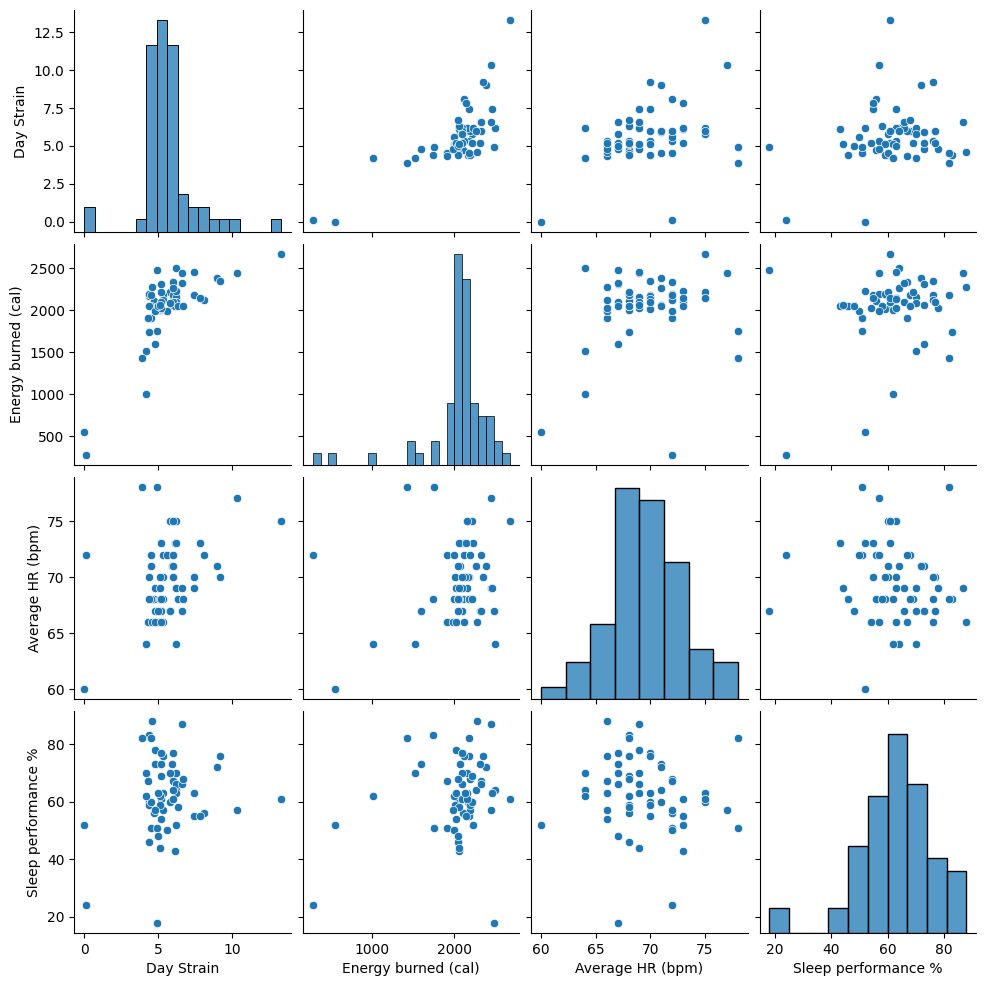

In [ ]:
# plt.title('Strain VS Sleep performance')
#sleep_data_whoop_parse_strain_comp = np.array(sleep_data_whoop_physio.iloc[:, [8,14]])
sleep_panda = sleep_data_whoop_physio.iloc[:, [8,14]]
#df = pd.DataFrame(sleep_data_whoop_parse_strain_comp)
#print(df)
#sleep_data_trimmed = sleep_data_whoop_physio[['Day Strain','Sleep performance %']]

print("--------------Removing NAN, NEW CLEAN DATA Multiple Features------------")
sleep_panda_multiple = sleep_data_whoop_physio.iloc[:,[8,9,11,14]]
sleep_data_whoop_parse_strain_comp_cleaned_multiple_physio = sleep_panda_multiple[~np.isnan(sleep_panda_multiple).any(axis=1)]
#print(sleep_data_whoop_parse_strain_comp_cleaned)
print(sleep_data_whoop_parse_strain_comp_cleaned_multiple_physio)

print("--------------Removing NAN, NEW CLEAN DATA For Two Features------------")
# nan_df = df.dropna()
# print(nan_df)

sleep_data_whoop_parse_strain_comp_cleaned = sleep_panda[~np.isnan(sleep_panda).any(axis=1)]
#print(sleep_data_whoop_parse_strain_comp_cleaned)
print(sleep_data_whoop_parse_strain_comp_cleaned)

sebastians_path_whoop_physiological_test_clean ='/content/physiological_cycles.csv'
sleep_data_whoop_physio_NAN_Test = pd.read_csv(sebastians_path_whoop_physiological_test_clean)
sleep_data_whoop_parse_strain_comp_test = np.array(sleep_data_whoop_physio_NAN_Test.iloc[:, [8,14]])
df = pd.DataFrame(sleep_data_whoop_parse_strain_comp_test)
#print(df)

df = pd.DataFrame(sleep_data_whoop_parse_strain_comp)
# rint(sleep_data_whoop_parse_strain_comp_test)

# The boolean allows from dropping and keeping values
# Storing all rows in a new array with True = a NAN row
# Negating keep all rows that do not have NAN

boolean_array = ~np.isnan(sleep_data_whoop_parse_strain_comp_test).any(axis=1)
nan_clean_array = sleep_data_whoop_parse_strain_comp_test[boolean_array]
#print(nan_clean_array)

# Pairplotting the reduced dataset
sns.pairplot(sleep_data_whoop_parse_strain_comp_cleaned_multiple_physio)





--------------Removing NAN, NEW CLEAN DATA Multiple Features------------
    Respiratory rate (rpm)  Asleep duration (min)  In bed duration (min)  \
0                     14.3                  293.0                  329.0   
2                     13.7                  465.0                  595.0   
3                     13.8                  426.0                  468.0   
4                     14.5                  322.0                  355.0   
5                     14.6                  338.0                  395.0   
..                     ...                    ...                    ...   
63                    14.4                  282.0                  323.0   
64                    14.5                  379.0                  441.0   
65                    14.1                  402.0                  426.0   
66                    14.0                  368.0                  409.0   
67                    14.6                  214.0                  251.0   

    Light slee

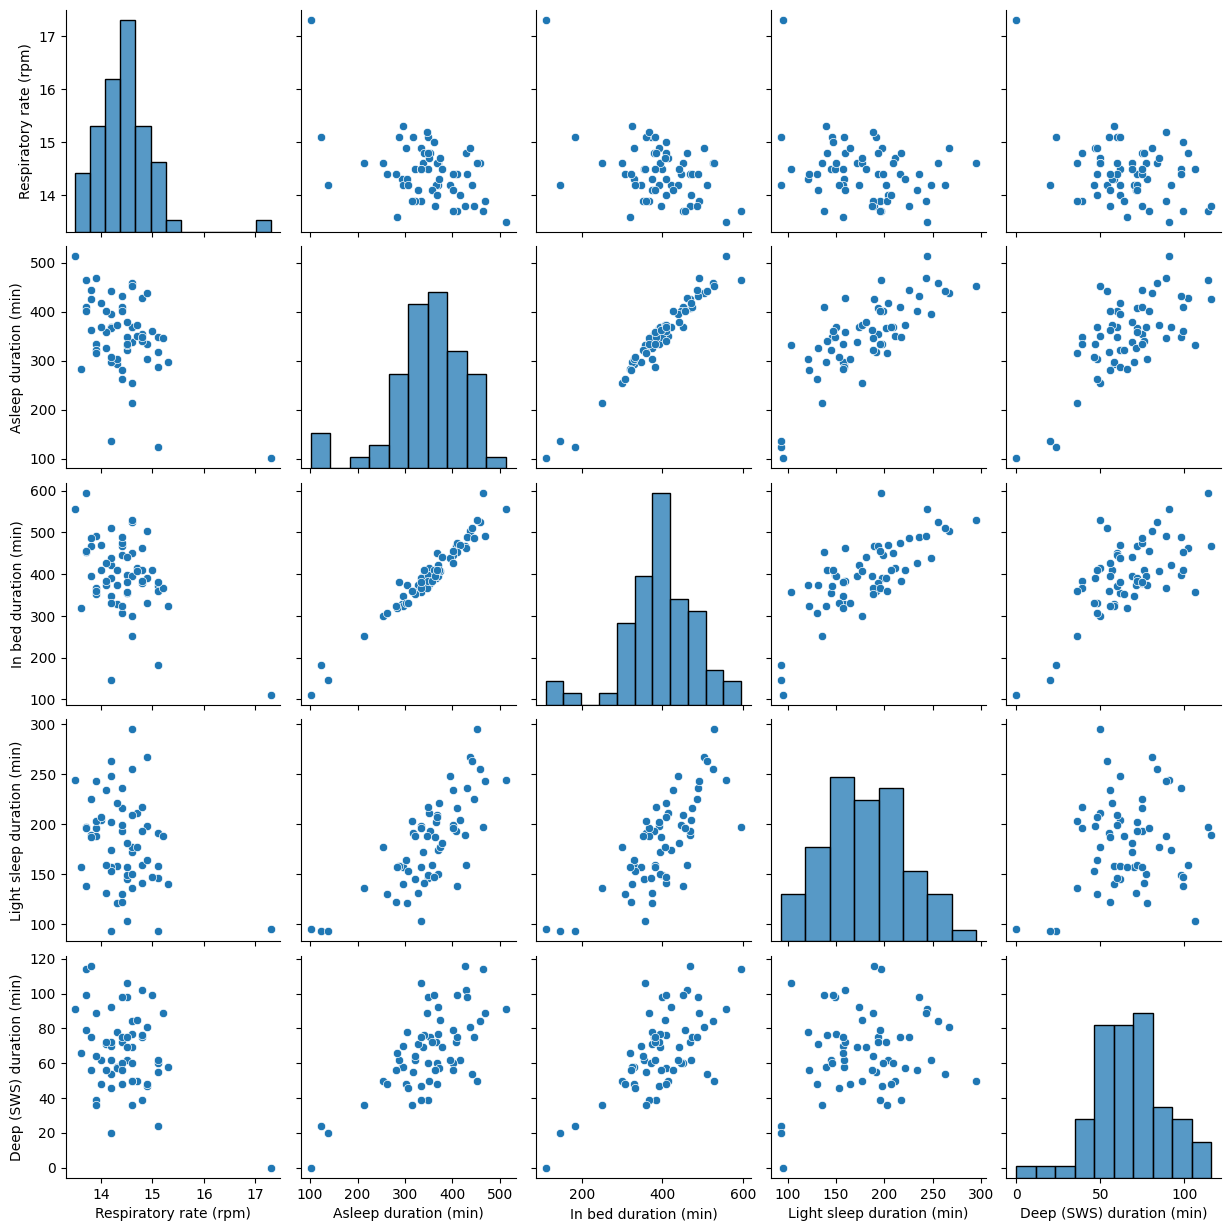

In [ ]:
print("--------------Removing NAN, NEW CLEAN DATA Multiple Features------------")
sleep_panda_multiple = sleep_data_whoop_physio.iloc[:,[15,16,17,18,19]]
sleep_data_whoop_parse_strain_comp_cleaned_multiple = sleep_panda_multiple[~np.isnan(sleep_panda_multiple).any(axis=1)]
#print(sleep_data_whoop_parse_strain_comp_cleaned)
print(sleep_data_whoop_parse_strain_comp_cleaned_multiple)

print("--------------Removing NAN, NEW CLEAN DATA For Two Features------------")
# nan_df = df.dropna()
# print(nan_df)

sleep_data_whoop_parse_strain_comp_cleaned = sleep_panda[~np.isnan(sleep_panda).any(axis=1)]
#print(sleep_data_whoop_parse_strain_comp_cleaned)
print(sleep_data_whoop_parse_strain_comp_cleaned)

sebastians_path_whoop_physiological_test_clean ='/content/physiological_cycles.csv'
sleep_data_whoop_physio_NAN_Test = pd.read_csv(sebastians_path_whoop_physiological_test_clean)
sleep_data_whoop_parse_strain_comp_test = np.array(sleep_data_whoop_physio_NAN_Test.iloc[:, [8,14]])
df = pd.DataFrame(sleep_data_whoop_parse_strain_comp_test)
#print(df)

df = pd.DataFrame(sleep_data_whoop_parse_strain_comp)
# rint(sleep_data_whoop_parse_strain_comp_test)

# The boolean allows from dropping and keeping values
# Storing all rows in a new array with True = a NAN row
# Negating keep all rows that do not have NAN

boolean_array = ~np.isnan(sleep_data_whoop_parse_strain_comp_test).any(axis=1)
nan_clean_array = sleep_data_whoop_parse_strain_comp_test[boolean_array]
#print(nan_clean_array)

# Pairplotting the reduced dataset
sns.pairplot(sleep_data_whoop_parse_strain_comp_cleaned_multiple)

# Linear Regression for Daily Strain vs Sleep Performance

$\hat{y}_i$​ = Predicted values of the target variable yy obtained from the regression model.

$y$ = Observed values of the target variable.

$\bar{y}$​ = Mean of the observed values of the target variable.



The Residual Sum of Squares (RSS) is calculated as:

\begin{equation*}
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation*}


\begin{align*}
&RSS \text{ is the Residual Sum of Squares,} \\
&n \text{ is the number of observations,} \\
&y_i \text{ is the observed value for the } i\text{th observation,} \\
&\hat{y}_i \text{ is the predicted value for the } i\text{th observation.}
\end{align*}


The Explained Sum of Squares (ESS) is calculated as:

\begin{equation*}
ESS = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2
\end{equation*}


\begin{align*}
&ESS \text{ is the Explained Sum of Squares,} \\
&n \text{ is the number of observations,} \\
&\hat{y}_i \text{ is the predicted value for the } i\text{th observation,} \\
&\bar{y} \text{ is the mean of the observed values.}
\end{align*}


The coefficient of determination (\( R^2 \)) is calculated as:

\begin{equation*}
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} = 1 - \frac{RSS}{ESS}
\end{equation*}


\begin{align*}
&R^2 \text{ is the coefficient of determination,} \\
&n \text{ is the number of observations,} \\
&y_i \text{ is the observed value for the } i\text{th observation,} \\
&\hat{y}_i \text{ is the predicted value for the } i\text{th observation,} \\
&\bar{y} \text{ is the mean of the observed values.}
\end{align*}




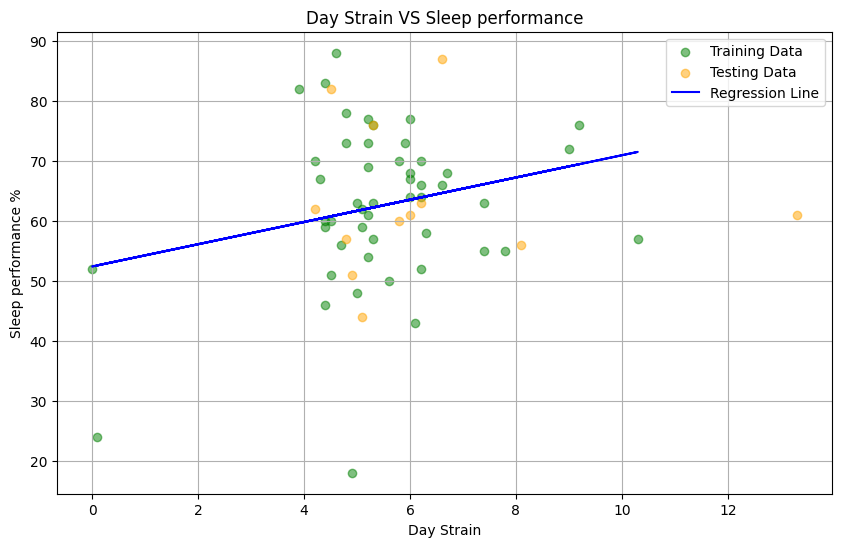

Prediction for 6: [[63.49754838]]
Training Set Metrics:
R-squared: 0.05893514150544665
Mean Absolute Error (MAE): 9.267899764640092
Mean Squared Error (MSE): 161.71421578341722

Testing Set Metrics:
R-squared: -0.16605815160501458
Mean Absolute Error (MAE): 10.482090709381806
Mean Squared Error (MSE): 166.42241063740457
    Day Strain  Sleep performance %
2          4.4                 83.0
3          5.9                 73.0
4          7.4                 55.0
5          6.2                 64.0
6          0.0                 52.0
..         ...                  ...
63         5.0                 48.0
64         6.6                 66.0
65         6.7                 68.0
66         7.4                 63.0
67         5.1                 44.0

[61 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:


'''
sample method in Pandas DataFrame with the frac parameter set, it randomly selects a fraction of the data from your DataFrame.
In this case, frac=0.8 means that 80% of your data will be randomly sampled to create the training set,
while the remaining 20% will be left out and can be used as the testing set.
'''


# Splitting the data into training and testing sets using sample method
# This parameter represents the fraction of the DataFrame to return.
#In this case, frac=0.8 means that 80% of the data will be randomly sampled.
train = sleep_data_whoop_parse_strain_comp_cleaned.sample(frac=0.8, random_state=42)
test = sleep_data_whoop_parse_strain_comp_cleaned.drop(train.index.tolist())

# Separate features and target variable for training and testing sets
x_train = train[['Day Strain']]
y_train = train[['Sleep performance %']]
x_test = test[['Day Strain']]
y_test = test[['Sleep performance %']]

# Training the model
model_lr = LinearRegression().fit(x_train, y_train)

# Predictions and evaluation on the training set
predicted_values_train = model_lr.predict(x_train)
r_squared_train = r2_score(y_true=y_train, y_pred=predicted_values_train)
mae_train = mean_absolute_error(y_train, predicted_values_train)
mse_train = mean_squared_error(y_train, predicted_values_train)

# Predictions and evaluation on the testing set
predicted_values_test = model_lr.predict(x_test)
r_squared_test = r2_score(y_true=y_test, y_pred=predicted_values_test)
mae_test = mean_absolute_error(y_test, predicted_values_test)
mse_test = mean_squared_error(y_test, predicted_values_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the training data
plt.scatter(x_train, y_train, alpha=0.5, color='green', label='Training Data')

# Plotting the testing data
plt.scatter(x_test, y_test, alpha=0.5, color='orange', label='Testing Data')

# Plotting the regression line
plt.plot(x_train, predicted_values_train, color='blue', label='Regression Line')

plt.xlabel('Day Strain')
plt.ylabel('Sleep performance %')
plt.title('Day Strain VS Sleep performance')
plt.legend()
plt.grid(True)
plt.show()


# Predicting for a specific value
predicted_value_for_2 = model_lr.predict([[6]])
print("Prediction for 6:", predicted_value_for_2)

# Printing evaluation metrics
print("Training Set Metrics:")
print("R-squared:", r_squared_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)

print("\nTesting Set Metrics:")
print("R-squared:", r_squared_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)

test.to_csv('DSSPTest.csv', index = True)
train.to_csv('DSSPTrain.csv', index = True)


print(sleep_data_whoop_parse_strain_comp_cleaned)

# print("Test:\n",test)
# print("Train:\n",train)

# Adding a constant term to the features for the statsmodels linear regression
#x_train_sm = sm.add_constant(x_train)

# Fitting the model
#model_sd = sm.OLS(y_train, x_train_sm).fit()

# Printing the summary which includes the p-values
#print(model_sd.summary())

# Multiple Linear Regression

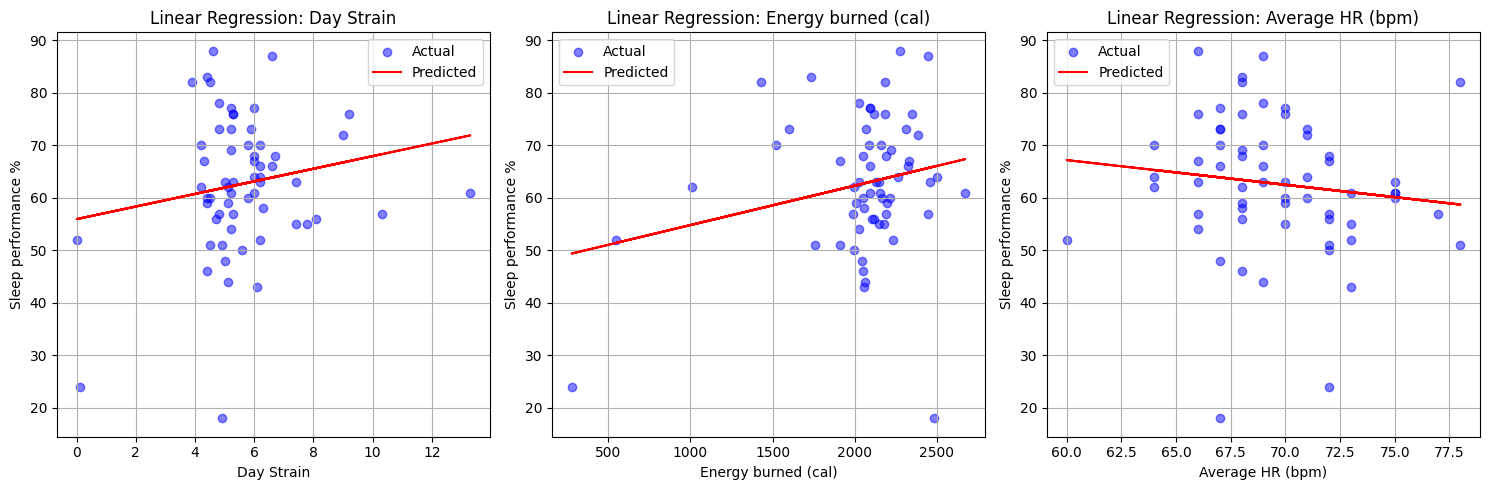

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



# Select features and target
X = sleep_data_whoop_parse_strain_comp_cleaned_multiple_physio[['Day Strain', 'Energy burned (cal)', 'Average HR (bpm)']]
y = sleep_data_whoop_parse_strain_comp_cleaned_multiple_physio['Sleep performance %']

# Train the linear regression model for each feature
plt.figure(figsize=(15, 5))

for i, feature in enumerate(X.columns):
    # Train the linear regression model
    model_lr_single = LinearRegression().fit(X[[feature]], y)

    # Make predictions
    predicted_values_single = model_lr_single.predict(X[[feature]])

    # Plotting
    plt.subplot(1, 3, i+1)
    plt.scatter(X[feature], y, color='blue', alpha=0.5, label='Actual')
    plt.plot(X[feature], predicted_values_single, color='red', label='Predicted')
    plt.xlabel(feature)
    plt.ylabel('Sleep performance %')
    plt.title('Linear Regression: ' + feature)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

sleep_data_whoop_parse_strain_comp_cleaned_multiple_physio.to_csv('DSEBAHR.csv', index = False)


# 3D Model for Day Strain + Energy Burned.

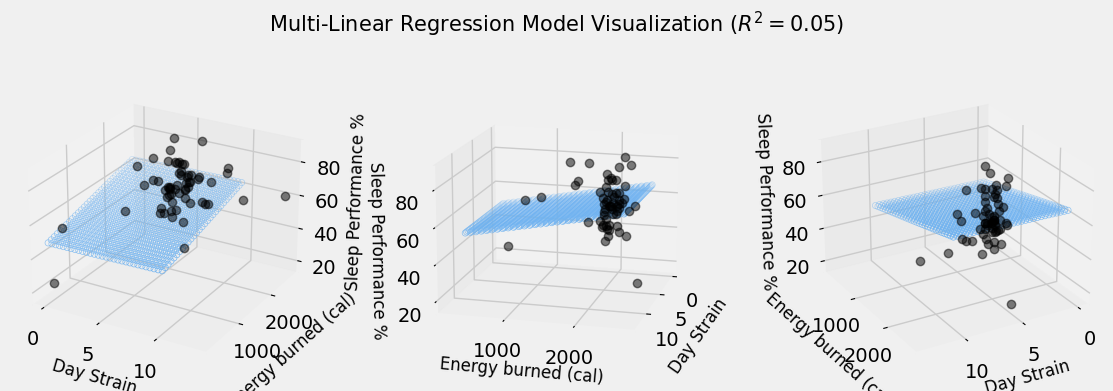

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Assuming sleep_data_whoop_parse_strain_comp_cleaned_multiple is defined

# Select features and target
X = sleep_data_whoop_parse_strain_comp_cleaned_multiple_physio[['Day Strain', 'Energy burned (cal)']].values.reshape(-1, 2)
Y = sleep_data_whoop_parse_strain_comp_cleaned_multiple_physio['Sleep performance %']

# TODO split data sets into training and testing 80:20

# New Training the model for multiple linear regression
model_lr_multi = LinearRegression().fit(X, Y)

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

# Create meshgrid for surface plot
xx_pred = np.linspace(0, 10, 30)
yy_pred = np.linspace(200, 2500, 30)
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
# model_viz = np.column_stack((xx_pred.flatten(), yy_pred.flatten()))
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model
predicted = model_lr_multi.predict(model_viz)

# Evaluate model by using its R^2 score
r2 = model_lr_multi.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Day Strain', fontsize=12)
    ax.set_ylabel('Energy burned (cal)', fontsize=12)
    ax.set_zlabel('Sleep Performance %', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = {:.2f}$)'.format(r2), fontsize=15, color='k')

fig.tight_layout()
plt.show()

sleep_data_whoop_parse_strain_comp_cleaned_multiple_physio.to_csv('3DModelOne.csv', index = False)


# 3D Model Number Two

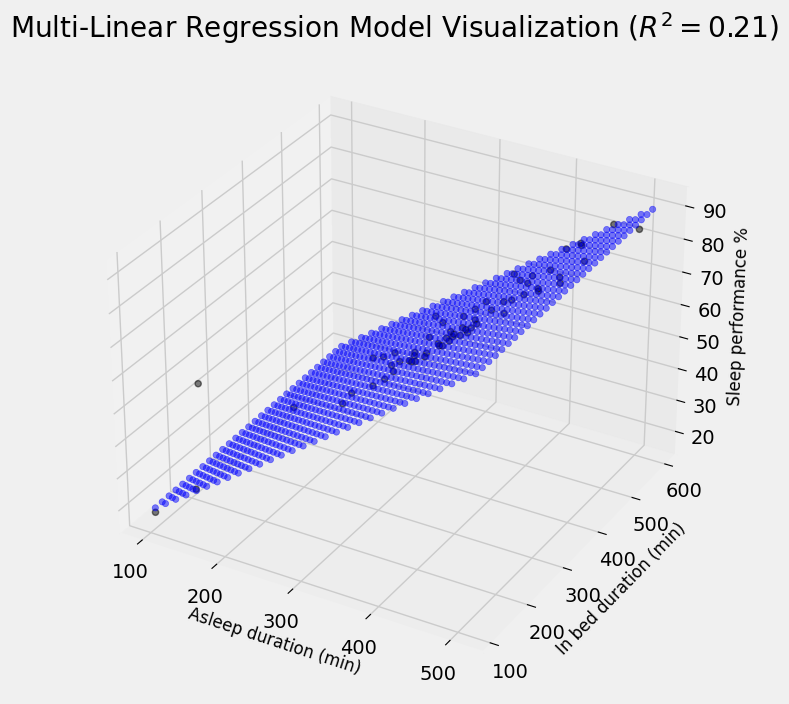

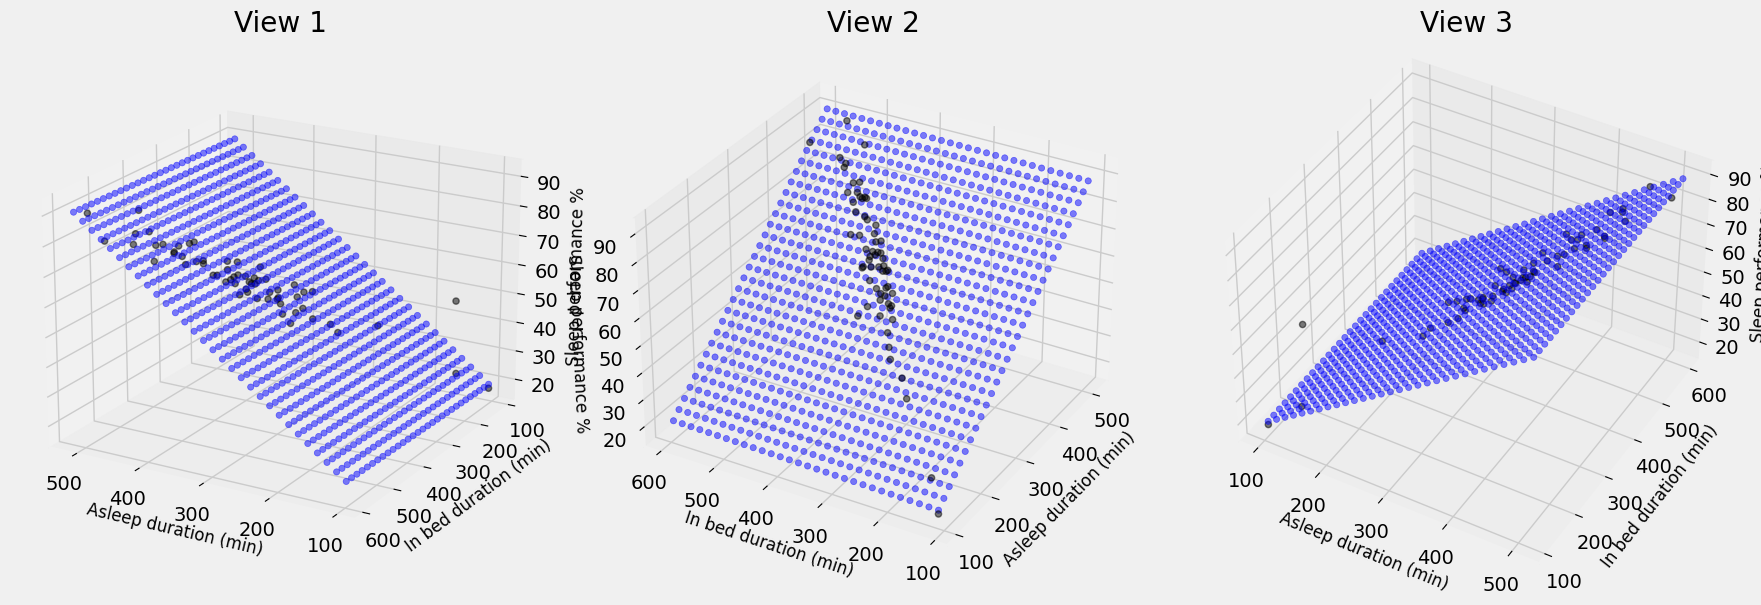

In [ ]:

# Load data
sebastians_path_whoop_physiological = '//content/physiological_cycles.csv'
sleep_data_whoop_physio = pd.read_csv(sebastians_path_whoop_physiological)

# Selecting features and target
feature_1 = 'Asleep duration (min)'  # Input variable 1
feature_2 = 'In bed duration (min)'  # Input variable 2
target = 'Sleep performance %'  # Output variable

# Clean the data by removing rows with NaN values
df_clean = sleep_data_whoop_physio[[feature_1, feature_2, target]].dropna()

# Prepare data for regression
X = df_clean[[feature_1, feature_2]].values
Y = df_clean[target].values

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression().fit(X_train, Y_train)

# Create meshgrid for the surface plot
x, y = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 30),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 30))
model_viz = np.column_stack((x.flatten(), y.flatten()))

# Predict using the model
predicted = model.predict(model_viz)

# Evaluate model
r2 = model.score(X_test, Y_test)

# Visualization
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))

# Plot original data and predictions
ax.scatter(X[:, 0], X[:, 1], Y, color='k', zorder=15, linestyle='', marker='o', alpha=0.5)
ax.scatter(x.flatten(), y.flatten(), predicted, color='blue', alpha=0.5, s=20, edgecolor='b')
ax.set_xlabel('Asleep duration (min)', fontsize=12)
ax.set_ylabel('In bed duration (min)', fontsize=12)
ax.set_zlabel('Sleep performance %', fontsize=12)
ax.set_title(f'Multi-Linear Regression Model Visualization ($R^2={r2:.2f}$)')


# Assuming the DataFrame and model are ready as per previous discussions

# Visualization
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18, 6))

# First view
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], Y, color='k', zorder=15, linestyle='', marker='o', alpha=0.5)
ax1.scatter(x.flatten(), y.flatten(), predicted, color='blue', alpha=0.5, s=20, edgecolor='b')
ax1.view_init(elev=20, azim=120)
ax1.set_xlabel('Asleep duration (min)', fontsize=12)
ax1.set_ylabel('In bed duration (min)', fontsize=12)
ax1.set_zlabel('Sleep performance %', fontsize=12)
ax1.set_title('View 1')

# Second view
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], Y, color='k', zorder=15, linestyle='', marker='o', alpha=0.5)
ax2.scatter(x.flatten(), y.flatten(), predicted, color='blue', alpha=0.5, s=20, edgecolor='b')
ax2.view_init(elev=30, azim=210)
ax2.set_xlabel('Asleep duration (min)', fontsize=12)
ax2.set_ylabel('In bed duration (min)', fontsize=12)
ax2.set_zlabel('Sleep performance %', fontsize=12)
ax2.set_title('View 2')

# Third view
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X[:, 0], X[:, 1], Y, color='k', zorder=15, linestyle='', marker='o', alpha=0.5)
ax3.scatter(x.flatten(), y.flatten(), predicted, color='blue', alpha=0.5, s=20, edgecolor='b')
ax3.view_init(elev=40, azim=300)
ax3.set_xlabel('Asleep duration (min)', fontsize=12)
ax3.set_ylabel('In bed duration (min)', fontsize=12)
ax3.set_zlabel('Sleep performance %', fontsize=12)
ax3.set_title('View 3')

plt.tight_layout()
plt.show()


sleep_data_whoop_physio.to_csv('3DModelTwo.csv', index = False)


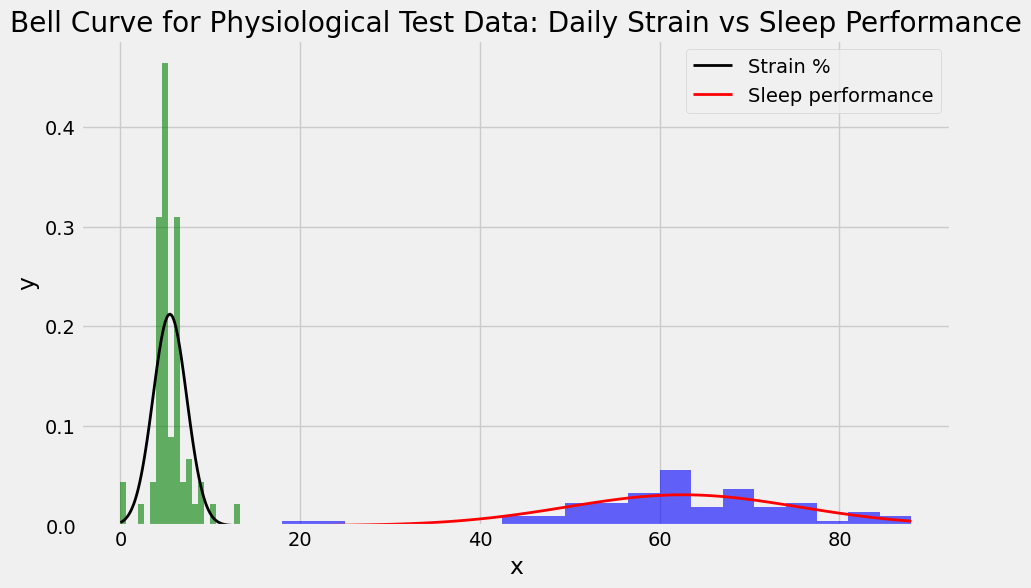

In [ ]:
# Your data loading code remains the same
sebastians_path_whoop_physiological_test_clean = '/content/physiological_cycles.csv'
sleep_data_whoop_physio_NAN_Test = pd.read_csv(sebastians_path_whoop_physiological_test_clean)
sleep_data_whoop_parse_strain_comp_test = np.array(sleep_data_whoop_physio_NAN_Test.iloc[:, [8, 14]])
df = pd.DataFrame(sleep_data_whoop_parse_strain_comp_test)
# print(df)

# Convert the DataFrame into a time series DataFrame
df.index = pd.date_range(start='2024-01-04', periods=len(df), freq='D')  # Adjust start date as needed

# Calculate mean and standard deviation for each column
mean_strain = df[0].mean()
std_strain = df[0].std()

mean_sleep_performance = df[1].mean()
std_sleep_performance = df[1].std()

# Plotting the bell curve for Strain %
plt.figure(figsize=(10, 6))
plt.hist(df[0], bins=20, density=True, alpha=0.6, color='g')

x_strain = np.linspace(df[0].min(), df[0].max(), 100)
p_strain = norm.pdf(x_strain, mean_strain, std_strain)
plt.plot(x_strain, p_strain, 'k', linewidth=2, label='Strain %')

# Plotting the bell curve for Sleep performance
plt.hist(df[1], bins=20, density=True, alpha=0.6, color='b')

x_sleep_performance = np.linspace(df[1].min(), df[1].max(), 100)
p_sleep_performance = norm.pdf(x_sleep_performance, mean_sleep_performance, std_sleep_performance)
plt.plot(x_sleep_performance, p_sleep_performance, 'r', linewidth=2, label='Sleep performance')

plt.title('Bell Curve for Physiological Test Data: Daily Strain vs Sleep Performance')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



   Strain  Sleep Performance %
0     NaN                 57.0
1     2.3                  NaN
2     4.4                 83.0
3     5.9                 73.0
4     7.4                 55.0
Mean of Strain: 5.488405797101449
Mean of Sleep Performance: 62.572463768115945
Standard Deviation Day Strain (filled):  1.8668577115731175
Standard Deviation Sleep Performance % (filled):  12.230108508704957
Strain Z-Scores:
0    -0.154487
1    -1.707900
2    -0.583015
3     0.220474
4     1.023964
        ...   
64    0.595436
65    0.649002
66    1.023964
67   -0.208053
68   -0.529449
Name: Day Strain, Length: 69, dtype: float64

Sleep Performance Z-Scores:
0    -0.455635
1    -0.005925
2     1.670266
3     0.852612
4    -0.619166
        ...   
64    0.280254
65    0.443785
66    0.034958
67   -1.518585
68   -0.005925
Name: Sleep performance %, Length: 69, dtype: float64


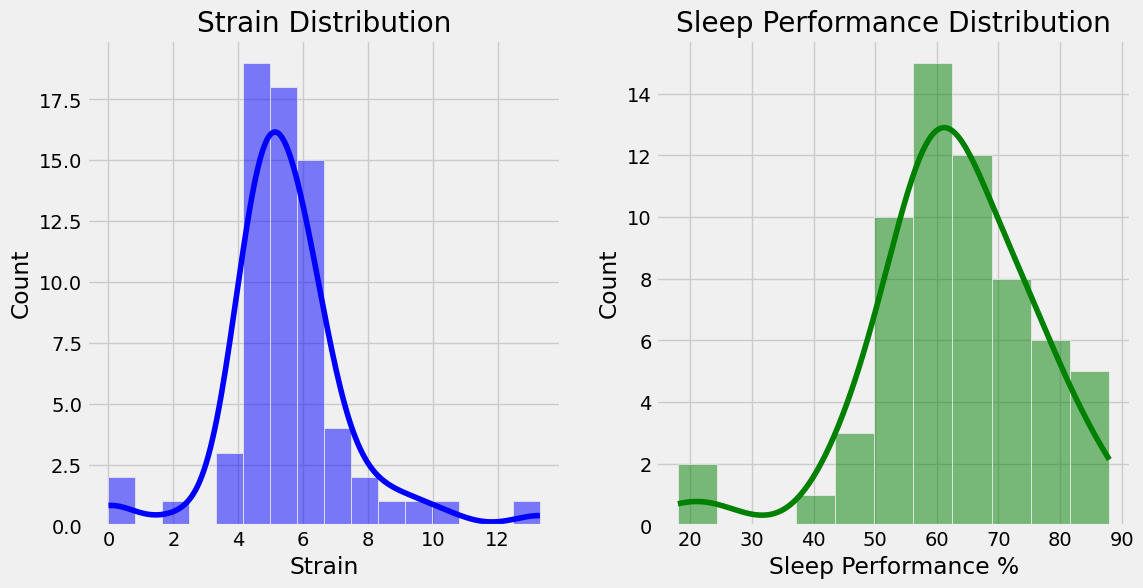

In [ ]:
# Path to the CSV file
sebastians_path_whoop_physiological_test_clean = '/content/physiological_cycles.csv'

# Load data
sleep_data_whoop_physio_NAN_Test = pd.read_csv(sebastians_path_whoop_physiological_test_clean)

# Extract the specific columns of interest
sleep_data_whoop_parse_strain_comp_test = np.array(sleep_data_whoop_physio_NAN_Test.iloc[:, [8, 14]])
df = pd.DataFrame(sleep_data_whoop_parse_strain_comp_test, columns=['Strain', 'Sleep Performance %'])

# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

# Extract the specific columns of interest
strain_data = sleep_data_whoop_physio_NAN_Test.iloc[:, 8]  # Strain data
sp = sleep_data_whoop_physio_NAN_Test.iloc[:, 14]  # Sleep performance data

# Calculate the median of the strain data, ignoring NaN values
median_strain = np.nanmedian(strain_data)
# Fill NaN values with the median of the strain data
strain_data_filled = strain_data.fillna(median_strain)
# Calculate the mean of the strain data
strain_mean = np.mean(strain_data_filled)
print('Mean of Strain:', strain_mean)

# Calculate the median of the sleep performance data, ignoring NaN values
median_sp = np.nanmedian(sp)
# Fill NaN values with the median of the sleep performance data
sp_filled = sp.fillna(median_sp)
# Calculate the mean of the sleep performance data
sp_mean = np.mean(sp_filled)
print('Mean of Sleep Performance:', sp_mean)

# Correcting the standard deviation calculation
# Using filled data for calculating standard deviation
sd_strain_filled = np.std(strain_data_filled, ddof=1)
print("Standard Deviation Day Strain (filled): ", sd_strain_filled)

sd_sp_filled = np.std(sp_filled, ddof=1)
print("Standard Deviation Sleep Performance % (filled): ", sd_sp_filled)

# Calculate z-scores
strain_z_scores = (strain_data_filled - strain_mean) / sd_strain_filled
sp_z_scores = (sp_filled - sp_mean) / sd_sp_filled

# Print z-scores
print("Strain Z-Scores:")
print(strain_z_scores)
print("\nSleep Performance Z-Scores:")
print(sp_z_scores)


# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plotting the histogram and KDE for each variable
plt.subplot(1, 2, 1)
sns.histplot(df['Strain'], kde=True, color='blue')
plt.title('Strain Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Sleep Performance %'], kde=True, color='green')
plt.title('Sleep Performance Distribution')

# Show the plots
plt.show()


[83. 73. 55. 64. 52. 18. 73. 56. 57. 51. 51. 60. 56. 72. 61. 59. 57. 60.
 63. 24. 60. 61. 61. 68. 78. 63. 50. 70. 62. 43. 52. 55. 73. 62. 76. 67.
 66. 59. 82. 77. 63. 69. 76. 67. 88. 46. 70. 58. 64. 70. 57. 87. 77. 82.
 76. 54. 48. 66. 68. 63. 44.]


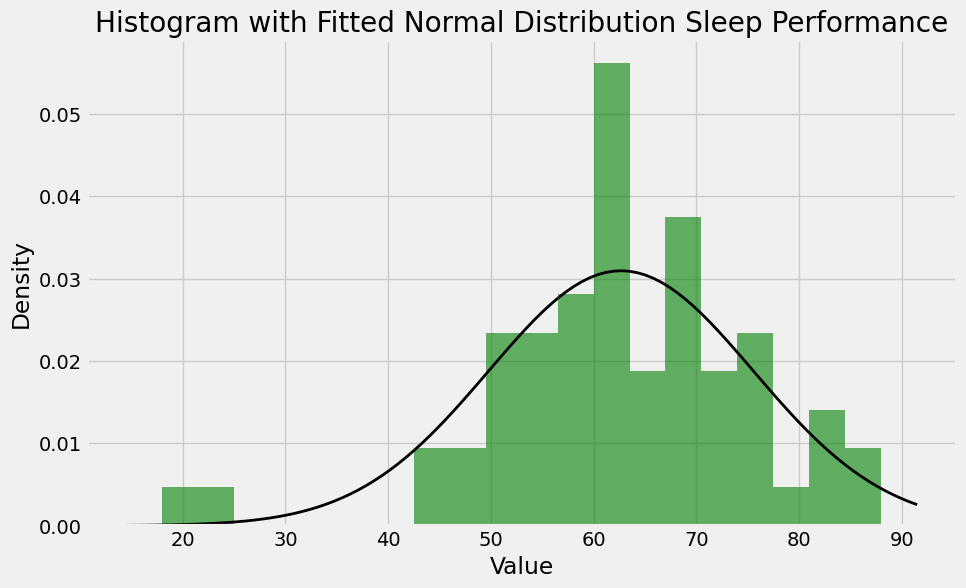

In [ ]:

# Assuming 'nan_clean_array' is already defined and clean of NaN values
# If you still need to clean NaNs from your dataset, you might use:
# nan_clean_array = nan_clean_array[~np.isnan(nan_clean_array[:, 1]), 1]

# Extracting values from the second column (the values we want to fit a bell curve to)
values = nan_clean_array[:, 1]
print(values)

# Fit a normal distribution to the data
mu, std = norm.fit(values)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(values, bins=20, density=True, alpha=0.6, color='g')

# Plot the fitted normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = 'Histogram with Fitted Normal Distribution Sleep Performance'
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


<!-- # Linear Regression for Daily Strain vs Sleep Performance -->



<!-- The Residual Sum of Squares (RSS) is calculated as:

\begin{equation*}
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation*}


\begin{align*}
&RSS \text{ is the Residual Sum of Squares,} \\
&n \text{ is the number of observations,} \\
&y_i \text{ is the observed value for the } i\text{th observation,} \\
&\hat{y}_i \text{ is the predicted value for the } i\text{th observation.}
\end{align*}


The Explained Sum of Squares (ESS) is calculated as:

\begin{equation*}
ESS = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2
\end{equation*}


\begin{align*}
&ESS \text{ is the Explained Sum of Squares,} \\
&n \text{ is the number of observations,} \\
&\hat{y}_i \text{ is the predicted value for the } i\text{th observation,} \\
&\bar{y} \text{ is the mean of the observed values.}
\end{align*}


The coefficient of determination (\( R^2 \)) is calculated as:

\begin{equation*}
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} = 1 - \frac{RSS}{ESS}
\end{equation*}


\begin{align*}
&R^2 \text{ is the coefficient of determination,} \\
&n \text{ is the number of observations,} \\
&y_i \text{ is the observed value for the } i\text{th observation,} \\
&\hat{y}_i \text{ is the predicted value for the } i\text{th observation,} \\
&\bar{y} \text{ is the mean of the observed values.}
\end{align*}
 -->



# Comparing Features Awake Duration VS Sleep Efficiency %


In [ ]:
sleep_data_whoop_parse_awake_comp = np.array(sleep_data_whoop_physio.iloc[:, [21,24]])
print("Awake Duration VS Sleep Efficiency %:\n ",sleep_data_whoop_parse_awake_comp)

sleep_panda_awake = sleep_data_whoop_physio.iloc[:, [21,24]]
print("--------------Removing NAN, NEW CLEAN DATA------------")

sleep_data_whoop_parse_awake_cleaned = sleep_panda_awake[~np.isnan(sleep_panda_awake).any(axis=1)]
#print(sleep_data_whoop_parse_strain_comp_cleaned)
print(sleep_data_whoop_parse_awake_cleaned)



Awake Duration VS Sleep Efficiency %:
  [[ 36.  89.]
 [ nan  nan]
 [130.  78.]
 [ 42.  91.]
 [ 33.  91.]
 [ 57.  85.]
 [ 59.  68.]
 [ 10.  90.]
 [ 33.  93.]
 [ 47.  87.]
 [ 57.  86.]
 [ 27.  92.]
 [ nan  nan]
 [ 50.  85.]
 [ 22.  94.]
 [ 42.  88.]
 [ 66.  87.]
 [ 25.  93.]
 [ 64.  84.]
 [ 24.  93.]
 [ 50.  89.]
 [ 53.  87.]
 [ nan  nan]
 [ 10.  93.]
 [ 69.  85.]
 [ 20.  95.]
 [ 36.  90.]
 [ 26.  93.]
 [ 66.  87.]
 [ nan  nan]
 [ 25.  94.]
 [ 94.  75.]
 [ 60.  87.]
 [ nan  nan]
 [ 48.  91.]
 [ 45.  89.]
 [ 71.  81.]
 [ 27.  91.]
 [ 64.  86.]
 [ 33.  90.]
 [ 54.  88.]
 [ 82.  82.]
 [ 33.  92.]
 [ 24.  93.]
 [ 68.  87.]
 [ 57.  88.]
 [ 25.  93.]
 [ 36.  91.]
 [ 42.  90.]
 [ 47.  88.]
 [ 44.  92.]
 [ 45.  86.]
 [ 45.  90.]
 [ 31.  91.]
 [ 33.  91.]
 [ 42.  90.]
 [ 36.  88.]
 [ 24.  95.]
 [ 54.  90.]
 [ nan  nan]
 [ 76.  85.]
 [ 41.  91.]
 [ 44.  88.]
 [ 41.  87.]
 [ 62.  86.]
 [ 24.  94.]
 [ 41.  90.]
 [ 37.  90.]
 [ nan  nan]]
--------------Removing NAN, NEW CLEAN DATA------------
    Awa

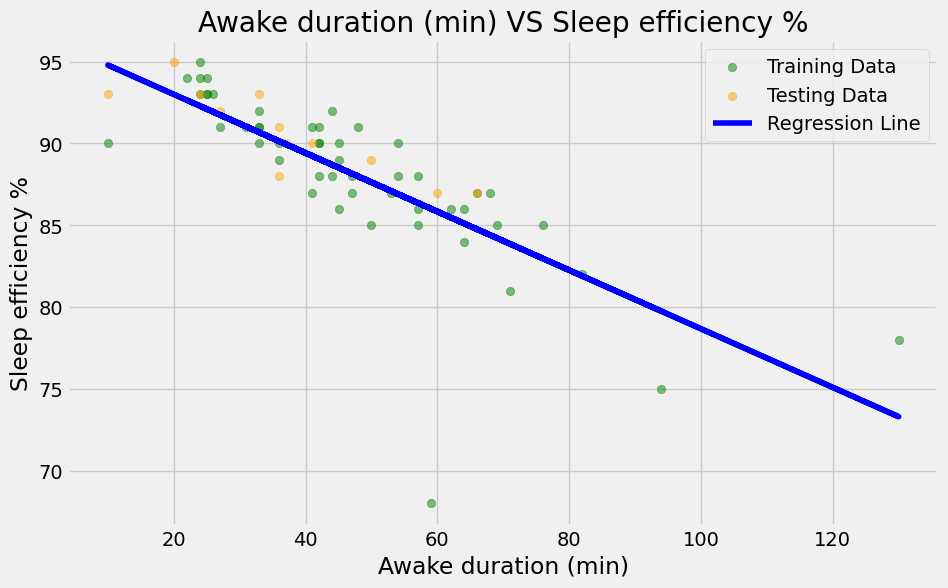

Prediction for 6: [[85.83958952]]
Training Set Metrics:
R-squared: 0.577861018368031
Mean Absolute Error (MAE): 1.8657923224141357
Mean Squared Error (MSE): 10.20309918604469

Testing Set Metrics:
R-squared: 0.634563753451556
Mean Absolute Error (MAE): 1.3033601344127241
Mean Squared Error (MSE): 2.2738255340792075


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
train = sleep_data_whoop_parse_awake_cleaned.sample(frac=0.8, random_state=42)
test = sleep_data_whoop_parse_awake_cleaned.drop(train.index.tolist())

# Separate features and target variable for training and testing sets
x_train_ad = train[['Awake duration (min)']]
y_train_se = train[['Sleep efficiency %']]
x_test_ad = test[['Awake duration (min)']]
y_test_se = test[['Sleep efficiency %']]

# Training the model
model_lr_awake = LinearRegression().fit(x_train_ad, y_train_se)

# Predictions and evaluation on the training set
predicted_values_train = model_lr_awake.predict(x_train_ad)
r_squared_train = r2_score(y_true=y_train_se, y_pred=predicted_values_train)
mae_train = mean_absolute_error(y_train_se, predicted_values_train)
mse_train = mean_squared_error(y_train_se, predicted_values_train)

# Predictions and evaluation on the testing set
predicted_values_test = model_lr_awake.predict(x_test_ad)
r_squared_test = r2_score(y_true=y_test_se, y_pred=predicted_values_test)
mae_test = mean_absolute_error(y_test_se, predicted_values_test)
mse_test = mean_squared_error(y_test_se, predicted_values_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the training data
plt.scatter(x_train_ad, y_train_se, alpha=0.5, color='green', label='Training Data')

# Plotting the testing data
plt.scatter(x_test_ad, y_test_se, alpha=0.5, color='orange', label='Testing Data')

# Plotting the regression line
plt.plot(x_train_ad, predicted_values_train, color='blue', label='Regression Line')

plt.xlabel('Awake duration (min)')
plt.ylabel('Sleep efficiency %')
plt.title('Awake duration (min) VS Sleep efficiency %')
plt.legend()
plt.grid(True)
plt.show()


# Predicting for a specific value
predicted_value_for_2 = model_lr_awake.predict([[60]])
print("Prediction for 6:", predicted_value_for_2)

# Printing evaluation metrics
print("Training Set Metrics:")
print("R-squared:", r_squared_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)

print("\nTesting Set Metrics:")
print("R-squared:", r_squared_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)


sleep_data_whoop_parse_awake_cleaned.to_csv('ADSE.csv', index = False)

# Max Heart Rate VS Day Strain






In [ ]:
sleep_panda_awake_ds_mhr = sleep_data_whoop_physio.iloc[:, [8,10]]
print("--------------Removing NAN, NEW CLEAN DATA------------")

sleep_data_whoop_clean_ds_mhr = sleep_panda_awake_ds_mhr[~np.isnan(sleep_panda_awake_ds_mhr).any(axis=1)]
print(sleep_data_whoop_clean_ds_mhr)

--------------Removing NAN, NEW CLEAN DATA------------
    Day Strain  Max HR (bpm)
1          2.3         113.0
2          4.4         124.0
3          5.9         129.0
4          7.4         153.0
5          6.2         151.0
..         ...           ...
64         6.6         139.0
65         6.7         156.0
66         7.4         157.0
67         5.1         117.0
68         4.5         119.0

[68 rows x 2 columns]


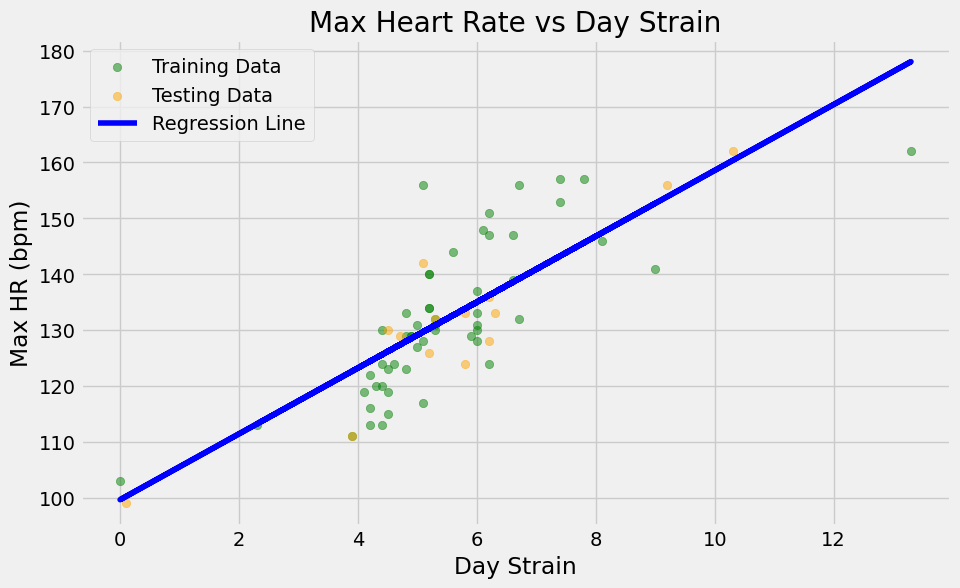

Prediction for 6: [[135.0265954]]
Training Set Metrics:
R-squared: 0.585210579311364
Mean Absolute Error (MAE): 6.763687515066721
Mean Squared Error (MSE): 75.00633111423791

Testing Set Metrics:
R-squared: 0.8425033777669046
Mean Absolute Error (MAE): 4.479598653985479
Mean Squared Error (MSE): 36.55609099617453


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
train = sleep_data_whoop_clean_ds_mhr.sample(frac=0.8, random_state=42)
test = sleep_data_whoop_clean_ds_mhr.drop(train.index.tolist())

# Separate features and target variable for training and testing sets
x_train_ad = train[['Day Strain']]
y_train_se = train[['Max HR (bpm)']]
x_test_ad = test[['Day Strain']]
y_test_se = test[['Max HR (bpm)']]

# Training the model
model_lr_mhr = LinearRegression().fit(x_train_ad, y_train_se)

# Predictions and evaluation on the training set
predicted_values_train = model_lr_mhr.predict(x_train_ad)
r_squared_train = r2_score(y_true=y_train_se, y_pred=predicted_values_train)
mae_train = mean_absolute_error(y_train_se, predicted_values_train)
mse_train = mean_squared_error(y_train_se, predicted_values_train)

# Predictions and evaluation on the testing set
predicted_values_test = model_lr_mhr.predict(x_test_ad)
r_squared_test = r2_score(y_true=y_test_se, y_pred=predicted_values_test)
mae_test = mean_absolute_error(y_test_se, predicted_values_test)
mse_test = mean_squared_error(y_test_se, predicted_values_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the training data
plt.scatter(x_train_ad, y_train_se, alpha=0.5, color='green', label='Training Data')

# Plotting the testing data
plt.scatter(x_test_ad, y_test_se, alpha=0.5, color='orange', label='Testing Data')

# Plotting the regression line
plt.plot(x_train_ad, predicted_values_train, color='blue', label='Regression Line')

plt.xlabel('Day Strain')
plt.ylabel('Max HR (bpm)')
plt.title('Max Heart Rate vs Day Strain')
plt.legend()
plt.grid(True)
plt.show()


# Predicting for a specific value
predicted_value_for_2 = model_lr_mhr.predict([[6]])
print("Prediction for 6:", predicted_value_for_2)

# Printing evaluation metrics
print("Training Set Metrics:")
print("R-squared:", r_squared_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)

print("\nTesting Set Metrics:")
print("R-squared:", r_squared_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)

sleep_data_whoop_clean_ds_mhr.to_csv('MHDS.csv', index = False)

# Max Heart Rate VS Sleep Performance %

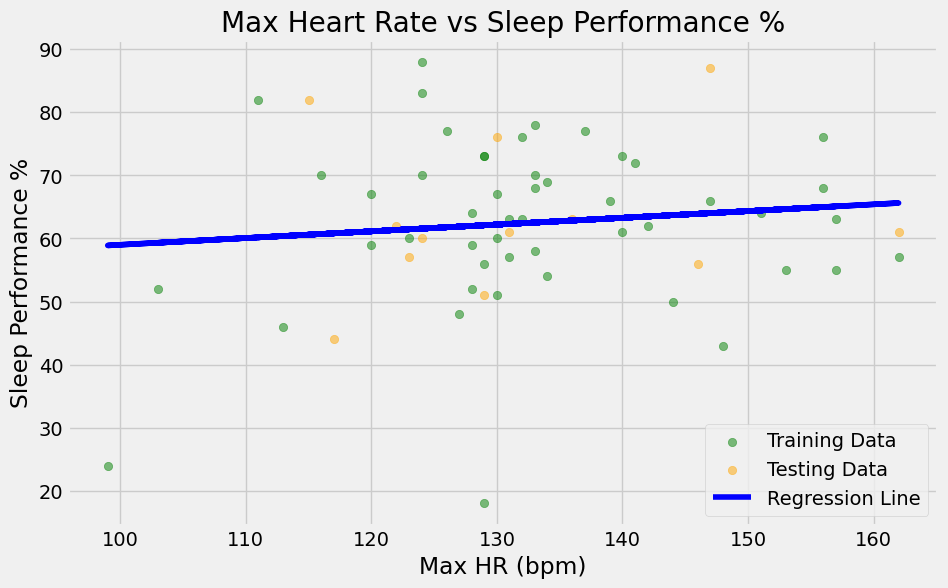

Prediction for 6: [[135.0265954]]
Training Set Metrics:
R-squared: 0.011881917345480053
Mean Absolute Error (MAE): 9.727542790086597
Mean Squared Error (MSE): 169.799923348019

Testing Set Metrics:
R-squared: 0.012691493982730284
Mean Absolute Error (MAE): 8.894353534790367
Mean Squared Error (MSE): 140.910863997687
    Max HR (bpm)  Sleep performance %
2          124.0                 83.0
3          129.0                 73.0
4          153.0                 55.0
5          151.0                 64.0
6          103.0                 52.0
..           ...                  ...
63         127.0                 48.0
64         139.0                 66.0
65         156.0                 68.0
66         157.0                 63.0
67         117.0                 44.0

[61 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
sleep_panda_awake_sp_mhr = sleep_data_whoop_physio.iloc[:, [10,14]]

sleep_data_whoop_clean_sp_mhr = sleep_panda_awake_sp_mhr[~np.isnan(sleep_panda_awake_sp_mhr).any(axis=1)]


train = sleep_data_whoop_clean_sp_mhr.sample(frac=0.8, random_state=42)
test = sleep_data_whoop_clean_sp_mhr.drop(train.index.tolist())

# Separate features and target variable for training and testing sets
x_train_ad = train[['Max HR (bpm)']]
y_train_se = train[['Sleep performance %']]
x_test_ad = test[['Max HR (bpm)']]
y_test_se = test[['Sleep performance %']]



# Training the model
model_lr_sp_mhr = LinearRegression().fit(x_train_ad, y_train_se)

# Predictions and evaluation on the training set
predicted_values_train = model_lr_sp_mhr.predict(x_train_ad)
r_squared_train = r2_score(y_true=y_train_se, y_pred=predicted_values_train)
mae_train = mean_absolute_error(y_train_se, predicted_values_train)
mse_train = mean_squared_error(y_train_se, predicted_values_train)

# Predictions and evaluation on the testing set
predicted_values_test = model_lr_sp_mhr.predict(x_test_ad)
r_squared_test = r2_score(y_true=y_test_se, y_pred=predicted_values_test)
mae_test = mean_absolute_error(y_test_se, predicted_values_test)
mse_test = mean_squared_error(y_test_se, predicted_values_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the training data
plt.scatter(x_train_ad, y_train_se, alpha=0.5, color='green', label='Training Data')

# Plotting the testing data
plt.scatter(x_test_ad, y_test_se, alpha=0.5, color='orange', label='Testing Data')

# Plotting the regression line
plt.plot(x_train_ad, predicted_values_train, color='blue', label='Regression Line')

plt.xlabel('Max HR (bpm)')
plt.ylabel('Sleep Performance %')
plt.title('Max Heart Rate vs Sleep Performance %')
plt.legend()
plt.grid(True)
plt.show()


# Predicting for a specific value
predicted_value_for_2 = model_lr_mhr.predict([[6]])
print("Prediction for 6:", predicted_value_for_2)

# Printing evaluation metrics
print("Training Set Metrics:")
print("R-squared:", r_squared_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)

print("\nTesting Set Metrics:")
print("R-squared:", r_squared_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)

print(sleep_data_whoop_clean_sp_mhr)

# Energy Burned VS Asleep duration (min)

In [ ]:
sleep_panda_full_data = sleep_data_whoop_physio.drop(columns = ['Cycle start time','Cycle end time','Cycle timezone','Sleep onset', 'Wake onset'])
sleep_panda_awake_dr = sleep_data_whoop_physio.iloc[:, [21,22]]
print("--------------Removing NAN, NEW CLEAN DATA------------")

sleep_data_whoop_parse_awake_sn_cleaned = sleep_panda_awake_dr[~np.isnan(sleep_panda_awake_dr).any(axis=1)]
#print(sleep_data_whoop_parse_strain_comp_cleaned)
print(sleep_data_whoop_parse_awake_sn_cleaned)

# determining the name of the file
file_name = 'SleepDataAwake.xlsx'
file_name_csv = 'SleepDataAwake.csv'

# saving the excel
sleep_data_whoop_parse_awake_sn_cleaned.to_excel(file_name)
sleep_data_whoop_parse_awake_sn_cleaned.to_csv(file_name_csv, index = False)
print('DataFrame is written to Excel File successfully.')

--------------Removing NAN, NEW CLEAN DATA------------
    Awake duration (min)  Sleep need (min)
0                   36.0             517.0
2                  130.0             561.0
3                   42.0             588.0
4                   33.0             580.0
5                   57.0             528.0
..                   ...               ...
63                  41.0             587.0
64                  62.0             578.0
65                  24.0             588.0
66                  41.0             585.0
67                  37.0             492.0

[62 rows x 2 columns]
DataFrame is written to Excel File successfully.


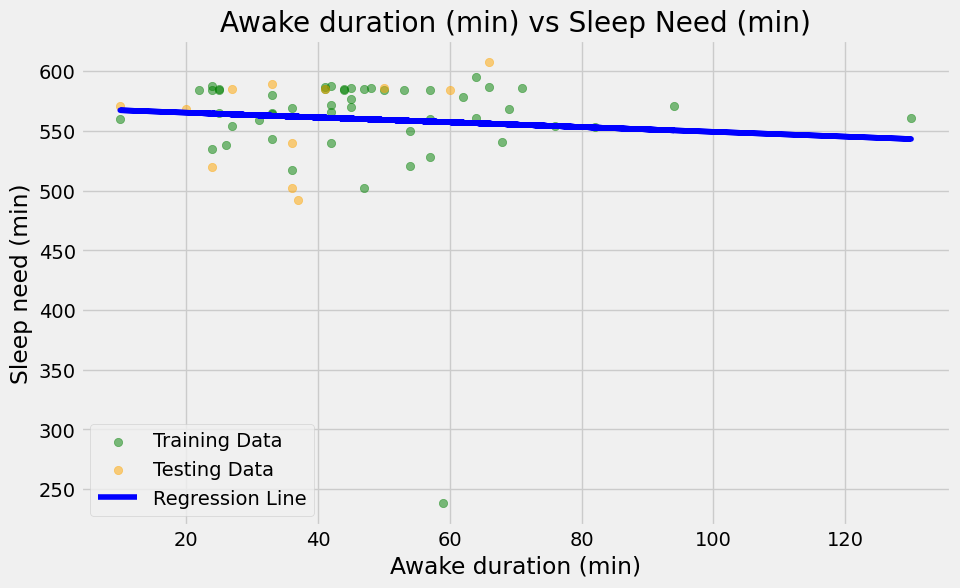

Prediction for 6: [[568.11695635]]
Training Set Metrics:
R-squared: 0.006823098497410696
Mean Absolute Error (MAE): 25.226951172788368
Mean Squared Error (MSE): 2547.6850723408634

Testing Set Metrics:
R-squared: -0.0636444237682563
Mean Absolute Error (MAE): 31.634011675359904
Mean Squared Error (MSE): 1401.4992567068675


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:

train = sleep_data_whoop_parse_awake_sn_cleaned.sample(frac=0.8, random_state=42)
test = sleep_data_whoop_parse_awake_sn_cleaned.drop(train.index.tolist())

# Separate features and target variable for training and testing sets
x_train_ = train[['Awake duration (min)']]
y_train_ = train[['Sleep need (min)']]
x_test_ = test[['Awake duration (min)']]
y_test_ = test[['Sleep need (min)']]

# Training the model
model_lr_dr_awake_sn_awake = LinearRegression().fit(x_train_, y_train_)

# Predictions and evaluation on the training set
predicted_values_train = model_lr_dr_awake_sn_awake.predict(x_train_)
r_squared_train = r2_score(y_true=y_train_, y_pred=predicted_values_train)
mae_train = mean_absolute_error(y_train_, predicted_values_train)
mse_train = mean_squared_error(y_train_, predicted_values_train)

# Predictions and evaluation on the testing set
predicted_values_test = model_lr_dr_awake_sn_awake.predict(x_test_)
r_squared_test = r2_score(y_true=y_test_, y_pred=predicted_values_test)
mae_test = mean_absolute_error(y_test_, predicted_values_test)
mse_test = mean_squared_error(y_test_, predicted_values_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the training data
plt.scatter(x_train_, y_train_, alpha=0.5, color='green', label='Training Data')

# Plotting the testing data
plt.scatter(x_test_, y_test_, alpha=0.5, color='orange', label='Testing Data')

# Plotting the regression line
plt.plot(x_train_, predicted_values_train, color='blue', label='Regression Line')

plt.xlabel('Awake duration (min)')
plt.ylabel('Sleep need (min)')
plt.title('Awake duration (min) vs Sleep Need (min)')
plt.legend()
plt.grid(True)
plt.show()


# Predicting for a specific value
predicted_value_for_awake = model_lr_dr_awake_sn_awake.predict([[6]])
print("Prediction for 6:", predicted_value_for_awake)

# Printing evaluation metrics
print("Training Set Metrics:")
print("R-squared:", r_squared_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)

print("\nTesting Set Metrics:")
print("R-squared:", r_squared_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)


sleep_data_whoop_parse_awake_sn_cleaned.to_csv('ADSN.csv', index = False)
xyTrain = pd.concat([x_train_, y_train_], axis = 1)
xyTest = pd.concat([x_test_, y_test_], axis = 1)
xyTrain.to_csv('TrainSN_New.csv', index = False)
xyTest.to_csv('TestSN_New.csv', index = False)

xy_train_test = pd.concat([x_train_, y_train_, x_test_, y_test_], axis = 1)

xy_train_test.to_csv('entire_train_test.csv', index = False)




# Mult Regression + Cleaned Data





In [ ]:

print("--------------Checking for bad data------------")
sleep_data_whoop_parse_awake_sn_cleaned = sleep_panda_full_data.dropna()
print(sleep_data_whoop_parse_awake_sn_cleaned.isnull().sum())
print("Cleaned entire dataset", sleep_data_whoop_parse_awake_sn_cleaned)

sp_ds_averageHR = sleep_data_whoop_parse_awake_sn_cleaned[['Day Strain', 'Average HR (bpm)','Sleep performance %' ]]
#print(sp_ds_averageHR)

# X = sp_ds_averageHR[['Day Strain', 'Average HR (bpm)']]
# y = sp_ds_averageHR[['Sleep performance %']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# # Training the model
# model_lr_mult_dahr = LinearRegression().fit(X_train, y_train)

# # Predictions on the test data
# predicted_values = model_lr_mult_dahr.predict(X_test)

# # Evaluation metrics on the test data
# r_squared = r2_score(y_true=y_test, y_pred=predicted_values)
# mae = mean_absolute_error(y_test, predicted_values)
# mse = mean_squared_error(y_test, predicted_values)

# # Sort the test data by 'Day Strain' for smooth line plotting
# sorted_indices = np.argsort(test['Day Strain'])
# sorted_day_strain = test['Day Strain'].values[sorted_indices]
# sorted_predicted_values = predicted_values[sorted_indices]

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.scatter(X['Day Strain'], y, alpha=0.5, color='green', label='Actual Data')
# plt.plot(sorted_day_strain, sorted_predicted_values, color='blue', label='Regression Line')
# plt.xlabel('Day Strain + Average HR (bpm)')
# plt.ylabel('Sleep need (min)')  # Adjust ylabel accordingly
# plt.title('Strain VS Sleep need')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Printing evaluation metrics
# print("Metrics:")
# print("R-squared:", r_squared)
# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)



--------------Checking for bad data------------
Recovery score %               0
Resting heart rate (bpm)       0
Heart rate variability (ms)    0
Skin temp (celsius)            0
Blood oxygen %                 0
Day Strain                     0
Energy burned (cal)            0
Max HR (bpm)                   0
Average HR (bpm)               0
Sleep performance %            0
Respiratory rate (rpm)         0
Asleep duration (min)          0
In bed duration (min)          0
Light sleep duration (min)     0
Deep (SWS) duration (min)      0
REM duration (min)             0
Awake duration (min)           0
Sleep need (min)               0
Sleep debt (min)               0
Sleep efficiency %             0
Sleep consistency %            0
dtype: int64
Cleaned entire dataset     Recovery score %  Resting heart rate (bpm)  Heart rate variability (ms)  \
2               85.0                      61.0                         58.0   
3               71.0                      61.0                   

# Sleep performance across all the cycles

# of cycle 51
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


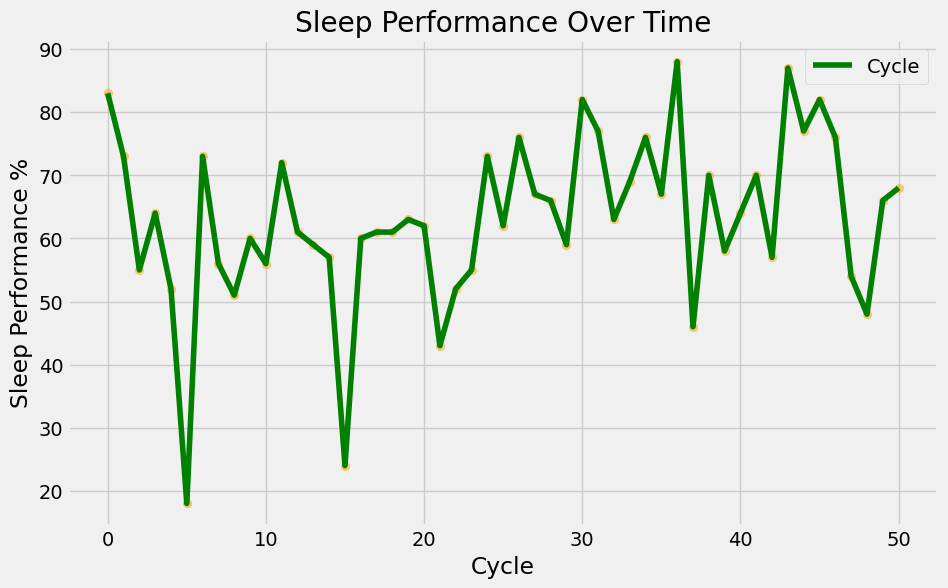

In [ ]:
cycle = sleep_data_whoop_parse_awake_sn_cleaned[['Sleep performance %']].size
y = sleep_data_whoop_parse_awake_sn_cleaned[['Sleep performance %']]
print('# of cycle', cycle)

# Do I want to retain the OG cycles that have been removed from the dataset
print(list(range(cycle)))

x = range(cycle)
plt.figure(figsize=(10, 6))


# Plotting the testing data
plt.scatter(x, y, alpha=0.5, color='orange', label='')

# Plotting the regression line
plt.plot(x, y, color='green', label='Cycle')

plt.xlabel('Cycle')
plt.ylabel('Sleep Performance %')
plt.title('Sleep Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()

sleep_data_whoop_parse_awake_sn_cleaned.to_csv('SPTime.csv', index = False)


# Regression for cycles and sleep performance

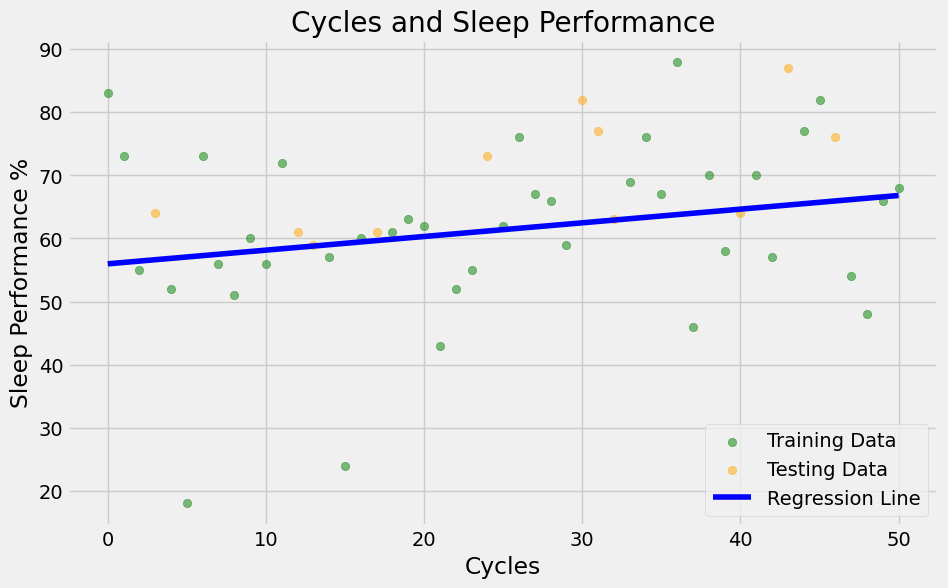

Prediction for 6: [[57.27180233]]
Training Set Metrics:
R-squared: 0.05616125449668408
Mean Absolute Error (MAE): 9.594767441860464
Mean Squared Error (MSE): 178.96126453488372

Testing Set Metrics:
R-squared: -0.4639490514394069
Mean Absolute Error (MAE): 8.14112050739958
Mean Squared Error (MSE): 123.79443549031413
Minimum Sleep Performance: 18.0
Maximum Sleep Performance: 88.0
Average Sleep Performance: 63.11764705882353
New data
     Cycles  Sleep Performance %
2        0                 83.0
3        1                 73.0
4        2                 55.0
5        3                 64.0
6        4                 52.0
7        5                 18.0
8        6                 73.0
9        7                 56.0
13       8                 51.0
14       9                 60.0
15      10                 56.0
16      11                 72.0
17      12                 61.0
18      13                 59.0
19      14                 57.0
23      15                 24.0
24      16        

In [ ]:
# Get the number of cycles
cycle = sleep_data_whoop_parse_awake_sn_cleaned[['Sleep performance %']].size

# Create a list of cycles
cycles = list(range(cycle))

# Create x as the predictor variable by changing it from row to column
x = np.array(cycles).reshape(-1, 1)

# Assign y as the response variable
y = sleep_data_whoop_parse_awake_sn_cleaned[['Sleep performance %']]

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training the model
model_lr_cycle = LinearRegression().fit(x_train, y_train)

# Predictions and evaluation on the training set
predicted_values_train = model_lr_cycle.predict(x_train)
r_squared_train = r2_score(y_train, predicted_values_train)
mae_train = mean_absolute_error(y_train, predicted_values_train)
mse_train = mean_squared_error(y_train, predicted_values_train)

# Predictions and evaluation on the testing set
predicted_values_test = model_lr_cycle.predict(x_test)
r_squared_test = r2_score(y_test, predicted_values_test)
mae_test = mean_absolute_error(y_test, predicted_values_test)
mse_test = mean_squared_error(y_test, predicted_values_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the training data
plt.scatter(x_train, y_train, alpha=0.5, color='green', label='Training Data')

# Plotting the testing data
plt.scatter(x_test, y_test, alpha=0.5, color='orange', label='Testing Data')

# Plotting the regression line
# Create a range of x-values that cover the entire range of training and testing data
x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
predicted_values_range = model_lr_cycle.predict(x_range)
plt.plot(x_range, predicted_values_range, color='blue', label='Regression Line')

plt.xlabel('Cycles')
plt.ylabel('Sleep Performance %')
plt.title('Cycles and Sleep Performance')
plt.legend()
plt.grid(True)
plt.show()

# Predicting for a specific value
predicted_value_for_cycle = model_lr_cycle.predict([[6]])
print("Prediction for 6:", predicted_value_for_cycle)

# Printing evaluation metrics
print("Training Set Metrics:")
print("R-squared:", r_squared_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)

print("\nTesting Set Metrics:")
print("R-squared:", r_squared_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("Minimum Sleep Performance:", y['Sleep performance %'].min())
print("Maximum Sleep Performance:", y['Sleep performance %'].max())
print("Average Sleep Performance:", y['Sleep performance %'].mean())

# Create a DataFrame with cycles and sleep performance
total_SP = pd.DataFrame({'Cycles': cycles, 'Sleep Performance %': sleep_data_whoop_parse_awake_sn_cleaned['Sleep performance %']})

# Print the DataFrame
print("New data\n", total_SP)

# Save the DataFrame to a CSV file
total_SP.to_csv('TotalSleepPerformance.csv', index=False)



# of cycles: 51
Cycles: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


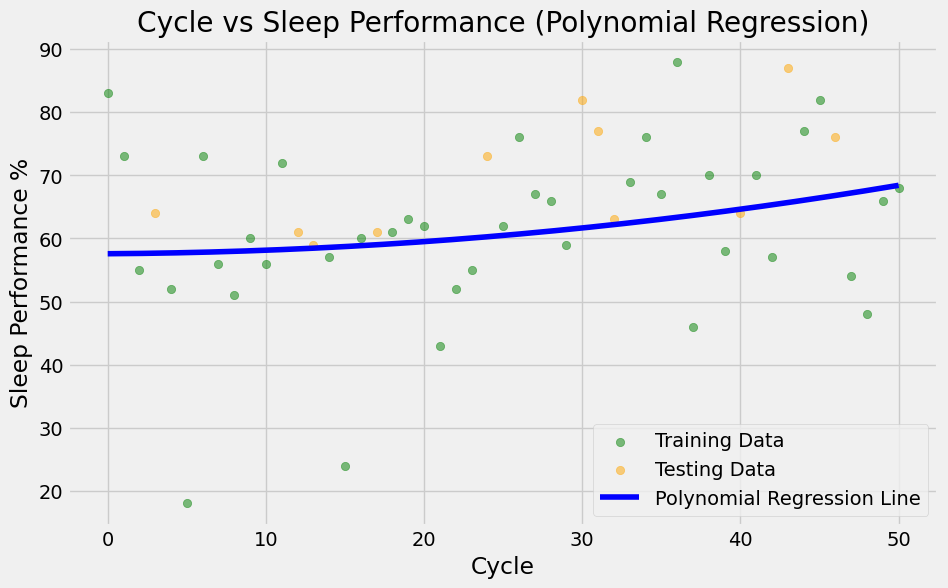

Training Set Metrics:
R-squared: 0.0595938534817505
Mean Absolute Error (MAE): 9.736557769920804
Mean Squared Error (MSE): 178.31040944132528

Testing Set Metrics:
R-squared: -0.5005592970466701
Mean Absolute Error (MAE): 8.336657248754296
Mean Squared Error (MSE): 126.8902704742275


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Assuming sleep_data_whoop_parse_awake_sn_cleaned is your DataFrame with correct column names
# and it has been previously defined

# Get the number of cycles
cycle = sleep_data_whoop_parse_awake_sn_cleaned[['Sleep performance %']].size
print('# of cycles:', cycle)

# Create a list of cycles
cycles = list(range(cycle))
print('Cycles:', cycles)

# Create x as the predictor variable
x = np.array(cycles).reshape(-1, 1)

# Assign y as the response variable
y = sleep_data_whoop_parse_awake_sn_cleaned[['Sleep performance %']]

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Polynomial features transformation
poly = PolynomialFeatures(degree=2)  # Adjust the degree to capture the relationship complexity
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Training the model
model_poly = LinearRegression().fit(x_train_poly, y_train)

# Predictions and evaluation on the training set
predicted_values_train = model_poly.predict(x_train_poly)
r_squared_train = r2_score(y_train, predicted_values_train)
mae_train = mean_absolute_error(y_train, predicted_values_train)
mse_train = mean_squared_error(y_train, predicted_values_train)

# Predictions and evaluation on the testing set
predicted_values_test = model_poly.predict(x_test_poly)
r_squared_test = r2_score(y_test, predicted_values_test)
mae_test = mean_absolute_error(y_test, predicted_values_test)
mse_test = mean_squared_error(y_test, predicted_values_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the training data
plt.scatter(x_train, y_train, alpha=0.5, color='green', label='Training Data')

# Plotting the testing data
plt.scatter(x_test, y_test, alpha=0.5, color='orange', label='Testing Data')

# Plotting the regression curve
# Create a smooth line for the polynomial curve by predicting over a continuous range
x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
predicted_values_range = model_poly.predict(x_range_poly)
plt.plot(x_range, predicted_values_range, color='blue', label='Polynomial Regression Line')

plt.xlabel('Cycle')
plt.ylabel('Sleep Performance %')
plt.title('Cycle vs Sleep Performance (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Printing evaluation metrics
print("Training Set Metrics:")
print("R-squared:", r_squared_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)

print("\nTesting Set Metrics:")
print("R-squared:", r_squared_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)

# Confusion Matrix

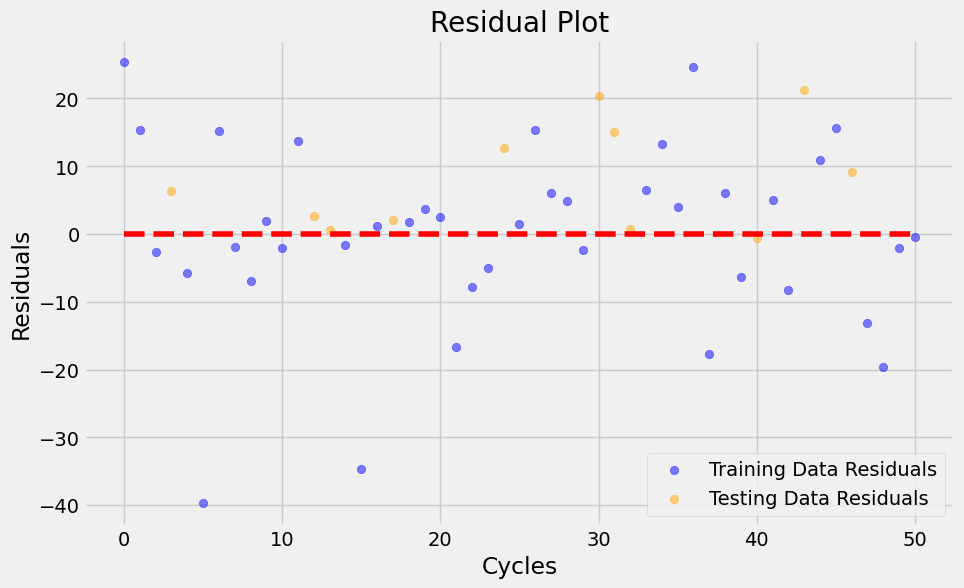

In [ ]:
# Calculate residuals
residuals_train = y_train - predicted_values_train
residuals_test = y_test - predicted_values_test

plt.figure(figsize=(10, 6))
plt.scatter(x_train, residuals_train, color='blue', alpha=0.5, label='Training Data Residuals')
plt.scatter(x_test, residuals_test, color='orange', alpha=0.5, label='Testing Data Residuals')
plt.hlines(y=0, xmin=x.min(), xmax=x.max(), colors='red', linestyles='dashed')
plt.xlabel('Cycles')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()


# Coffee vs Sleep Performance

    Sleep performance %  Coffee Intake (mg)
0                    52                 480
1                    64                 160
2                    55                 320
3                    83                 160
4                    57                 160
5                    59                 200
6                    68                 200
7                    71                 240
8                    63                  80
9                    67                 240
10                   54                 240
11                   59                 320
12                   56                 200
13                  240                 240
14                   58                 320
15                   79                 640
16                   86                 300
17                   81                 240
18                   62                 400
19                   64                 320
20                   49                 320
21                   73         

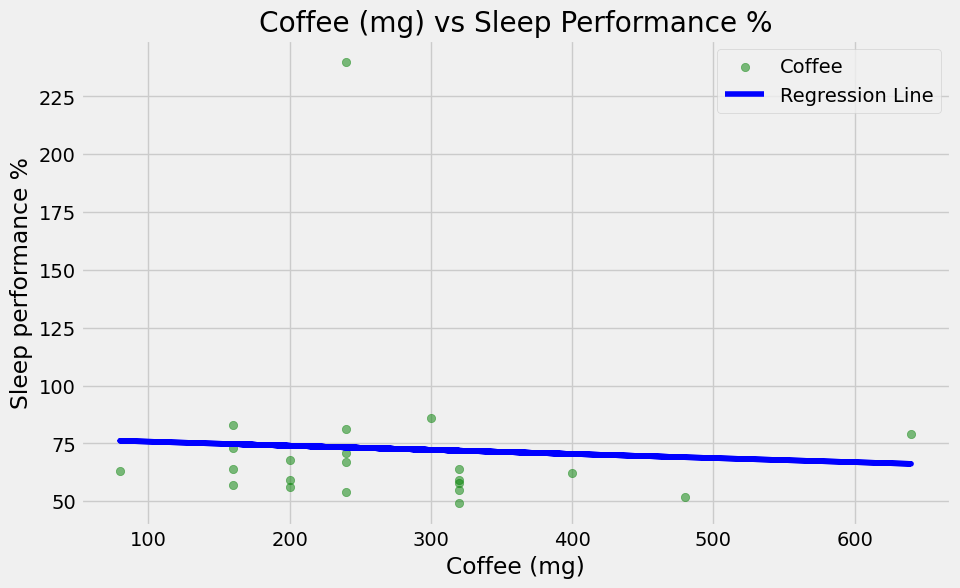

Coffee Set Metrics:
R-squared: 0.0031536495430148914
Mean Absolute Error (MAE): 9.267899764640092
Mean Squared Error (MSE): 161.71421578341722


In [ ]:
import matplotlib.pyplot as plt
#import mplcursors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


sleep_coffee='/content/CoffeeSleepPer.csv'
sleep_data_coffee = pd.read_csv(sleep_coffee)
print(sleep_data_coffee)

# Assuming 'sleep_data_whoop_parse_strain_comp_cleaned' is already defined and imported

# # Splitting the data into training and testing sets using sample method
# train = sleep_data_whoop_parse_strain_comp_cleaned.sample(frac=0.8, random_state=42)
# test = sleep_data_whoop_parse_strain_comp_cleaned.drop(train.index)

# Separate features and target variable for training and testing sets
coffee = sleep_data_coffee[['Coffee Intake (mg)']]
spComp = sleep_data_coffee[['Sleep performance %']]


# Training the model
model_lr = LinearRegression().fit(coffee, spComp)

# Predictions and evaluation on the training set
predicted_values = model_lr.predict(coffee)
r_squared_train = r2_score(y_true=spComp, y_pred=predicted_values)
mae_sp = mean_absolute_error(spComp, predicted_values)
mse_sp = mean_squared_error(spComp, predicted_values)


# Plotting
plt.figure(figsize=(10, 6))

# Plotting the training data
plt.scatter(coffee, spComp, alpha=0.5, color='green', label='Coffee')
# Plotting the testing data


# Plotting the regression line
plt.plot(coffee, predicted_values, color='blue', label='Regression Line')

plt.xlabel('Coffee (mg)')
plt.ylabel('Sleep performance %')
plt.title('Coffee (mg) vs Sleep Performance %')
plt.legend()
plt.grid(True)
plt.show()

# Printing evaluation metrics
print("Coffee Set Metrics:")
print("R-squared:", r_squared_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)


    Deep (SWS) duration (min)  Sleep performance %
0                          58                   57
1                         114                   83
2                         116                   73
3                          62                   55
4                          69                   64
..                        ...                  ...
58                         56                   48
59                         69                   66
60                         56                   68
61                         48                   63
62                         36                   44

[63 rows x 2 columns]


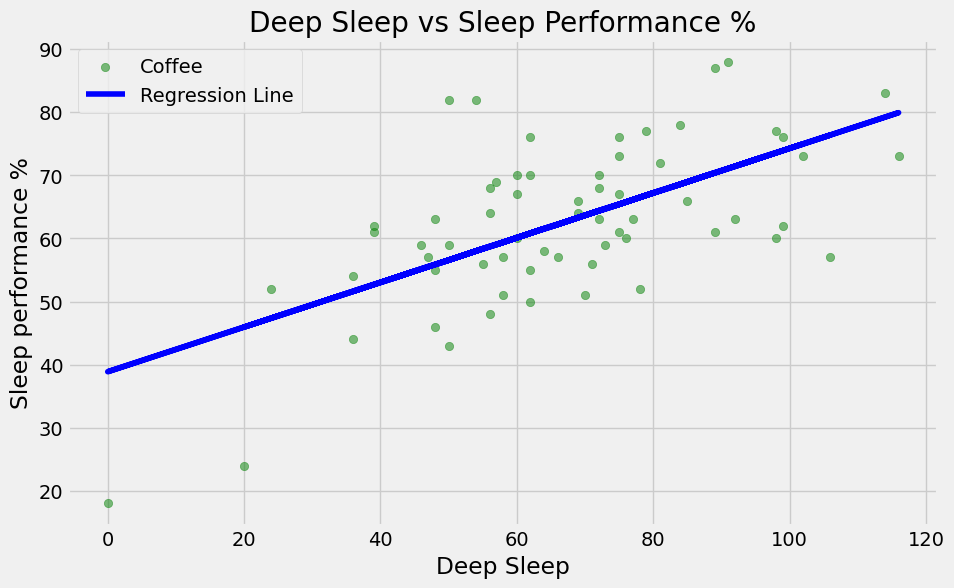

Coffee Set Metrics:
R-squared: 0.38324299725664857
Mean Absolute Error (MAE): 9.267899764640092
Mean Squared Error (MSE): 161.71421578341722


In [ ]:
import matplotlib.pyplot as plt
#import mplcursors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


sleep_coffee='/content/DSPerformance.csv'
sleep_data_coffee = pd.read_csv(sleep_coffee)
print(sleep_data_coffee)

# Assuming 'sleep_data_whoop_parse_strain_comp_cleaned' is already defined and imported

# # Splitting the data into training and testing sets using sample method
# train = sleep_data_whoop_parse_strain_comp_cleaned.sample(frac=0.8, random_state=42)
# test = sleep_data_whoop_parse_strain_comp_cleaned.drop(train.index)

# Separate features and target variable for training and testing sets
coffee = sleep_data_coffee[['Deep (SWS) duration (min)']]
spComp = sleep_data_coffee[['Sleep performance %']]


# Training the model
model_lr = LinearRegression().fit(coffee, spComp)

# Predictions and evaluation on the training set
predicted_values = model_lr.predict(coffee)
r_squared_train = r2_score(y_true=spComp, y_pred=predicted_values)
mae_sp = mean_absolute_error(spComp, predicted_values)
mse_sp = mean_squared_error(spComp, predicted_values)


# Plotting
plt.figure(figsize=(10, 6))

# Plotting the training data
plt.scatter(coffee, spComp, alpha=0.5, color='green', label='Coffee')
# Plotting the testing data


# Plotting the regression line
plt.plot(coffee, predicted_values, color='blue', label='Regression Line')

plt.xlabel('Deep Sleep')
plt.ylabel('Sleep performance %')
plt.title('Deep Sleep vs Sleep Performance %')
plt.legend()
plt.grid(True)
plt.show()

# Printing evaluation metrics
print("Coffee Set Metrics:")
print("R-squared:", r_squared_train)
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)